In [ ]:
# ## 📊 Upcoming Exploratory Data Analysis (EDA)
# 
# In this notebook, we will be conducting an in-depth Exploratory Data Analysis (EDA) using all the files available in the `data` folder. This will include:
# 
# - Examining player statistics, market values, and contract details
# - Understanding the structure and relationships between datasets (e.g., `como_agecurve_wide.csv`, `fbref_20242025.csv`, `fbref_20252026.csv`, and `transfermarkt_contracts.csv`)
# - Identifying trends, distributions, and potential data quality issues
# - Preparing insights to inform further modeling and analysis for Como 1907's squad
# 
# Stay tuned as we dive into the data, this is a work in progress with a large helping hand from AI tooling!


In [105]:
# Import necessary libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

print("📊 Libraries imported successfully!")
print("🎨 Plotting style configured")
print("📋 Display options set for better readability")


📊 Libraries imported successfully!
🎨 Plotting style configured
📋 Display options set for better readability


In [106]:
# Load all datasets
data_path = Path('data')

# Load main datasets
como_agecurve = pd.read_csv(data_path / 'como_agecurve_wide.csv')
fbref_2425 = pd.read_csv(data_path / 'intermediate' / 'fbref_20242025.csv')
fbref_2526 = pd.read_csv(data_path / 'intermediate' / 'fbref_20252026.csv')
transfermarkt = pd.read_csv(data_path / 'intermediate' / 'transfermarkt_contracts.csv')
capology = pd.read_csv(data_path / 'intermediate' / 'capology_wages.csv')
capology_manual = pd.read_csv(data_path / 'intermediate' / 'Como_Wage_Breakdown_2425_2526_Cleaned.csv')

print("📁 All datasets loaded successfully!")
print(f"📊 como_agecurve_wide.csv: {como_agecurve.shape}")
print(f"📊 fbref_20242025.csv: {fbref_2425.shape}")
print(f"📊 fbref_20252026.csv: {fbref_2526.shape}")
print(f"📊 transfermarkt_contracts.csv: {transfermarkt.shape}")
print(f"📊 capology_wages.csv: {capology.shape}")
print(f"📊 Como_Wage_Breakdown_2425_2526_Cleaned.csv: {capology_manual.shape}")


📁 All datasets loaded successfully!
📊 como_agecurve_wide.csv: (59, 36)
📊 fbref_20242025.csv: (49, 8)
📊 fbref_20252026.csv: (30, 8)
📊 transfermarkt_contracts.csv: (183, 3)
📊 capology_wages.csv: (75, 6)
📊 Como_Wage_Breakdown_2425_2526_Cleaned.csv: (75, 8)


In [107]:
# Dataset Overview and Basic Statistics
print("🔍 DATASET OVERVIEW")
print("=" * 50)

datasets = {
    'Como Age Curve': como_agecurve,
    'FBRef 2024-25': fbref_2425,
    'FBRef 2025-26': fbref_2526,
    'Transfermarkt Contracts': transfermarkt,
    'Capology Wages': capology
}

for name, df in datasets.items():
    print(f"\n📊 {name}")
    print(f"   Shape: {df.shape}")
    print(f"   Columns: {list(df.columns)}")
    print(f"   Memory usage: {df.memory_usage(deep=True).sum() / 1024:.1f} KB")
    print(f"   Missing values: {df.isnull().sum().sum()}")
    print(f"   Duplicate rows: {df.duplicated().sum()}")
    
    # Show sample data
    print(f"   Sample data:")
    print(df.head(2).to_string())
    print("-" * 30)


🔍 DATASET OVERVIEW

📊 Como Age Curve
   Shape: (59, 36)
   Columns: ['Player', '2024-2025_std_Pos', '2024-2025_std_Age', '2024-2025_std_Min', '2024-2025_std_90s', '2024-2025_poss_Att Pen', '2024-2025_play_Min', '2024-2025_play_90s', '2025-2026_std_Pos', '2025-2026_std_Age', '2025-2026_std_Min', '2025-2026_std_90s', '2025-2026_poss_Att Pen', '2025-2026_play_Min', '2025-2026_play_90s', 'MarketValue', 'Season', 'Weekly_Gross_EUR', 'Yearly_Gross_EUR', 'Position', 'Age', 'Latest_Pos', 'Latest_Pos4', 'Age_latest', 'Minutes_2425', 'Minutes_2526', 'xG_plus_xAG_2425', 'xG_plus_xAG_2526', 'PrgPasses_25', 'PrgPasses_per90_25', 'FinalThirdTouches_25', 'FinalThirdTouches_per90_25', 'PrgPasses_26', 'PrgPasses_per90_26', 'FinalThirdTouches_26', 'FinalThirdTouches_per90_26']
   Memory usage: 40.0 KB
   Missing values: 1273
   Duplicate rows: 0
   Sample data:
            Player 2024-2025_std_Pos  2024-2025_std_Age  2024-2025_std_Min  2024-2025_std_90s  2024-2025_poss_Att Pen  2024-2025_play_Min  2024-

In [108]:
# Detailed Analysis: Como Age Curve Dataset
print("🏆 COMO AGE CURVE DATASET ANALYSIS")
print("=" * 50)

# Basic info
print(f"📊 Dataset Shape: {como_agecurve.shape}")
print(f"📋 Columns: {len(como_agecurve.columns)}")
print(f"👥 Unique Players: {como_agecurve['Player'].nunique()}")

# Player analysis
print(f"\n👥 PLAYER ANALYSIS")
print(f"   Total player records: {len(como_agecurve)}")
print(f"   Unique players: {como_agecurve['Player'].nunique()}")
print(f"   Players with multiple seasons: {como_agecurve['Player'].value_counts().gt(1).sum()}")

# Position analysis
print(f"\n⚽ POSITION ANALYSIS")
position_cols = [col for col in como_agecurve.columns if 'Pos' in col]
for col in position_cols:
    if col in como_agecurve.columns:
        print(f"   {col}: {como_agecurve[col].value_counts().head(3).to_dict()}")

# Age analysis
print(f"\n🎂 AGE ANALYSIS")
age_cols = [col for col in como_agecurve.columns if 'Age' in col]
for col in age_cols:
    if col in como_agecurve.columns and como_agecurve[col].dtype in ['float64', 'int64']:
        print(f"   {col}: Min={como_agecurve[col].min():.1f}, Max={como_agecurve[col].max():.1f}, Mean={como_agecurve[col].mean():.1f}")

# Minutes analysis
print(f"\n⏱️ MINUTES ANALYSIS")
min_cols = [col for col in como_agecurve.columns if 'Min' in col]
for col in min_cols:
    if col in como_agecurve.columns and como_agecurve[col].dtype in ['float64', 'int64']:
        print(f"   {col}: Min={como_agecurve[col].min():.0f}, Max={como_agecurve[col].max():.0f}, Mean={como_agecurve[col].mean():.0f}")

# Market value analysis
if 'MarketValue' in como_agecurve.columns:
    print(f"\n💰 MARKET VALUE ANALYSIS")
    market_values = como_agecurve['MarketValue'].dropna()
    if len(market_values) > 0:
        print(f"   Non-null market values: {len(market_values)}")
        print(f"   Sample values: {market_values.head(5).tolist()}")

# Season analysis
if 'Season' in como_agecurve.columns:
    print(f"\n📅 SEASON ANALYSIS")
    print(f"   Seasons: {como_agecurve['Season'].value_counts().to_dict()}")

print(f"\n🔍 MISSING DATA ANALYSIS")
missing_data = como_agecurve.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
if len(missing_data) > 0:
    print("   Columns with missing data:")
    for col, count in missing_data.items():
        print(f"   {col}: {count} ({count/len(como_agecurve)*100:.1f}%)")
else:
    print("   No missing data found!")


🏆 COMO AGE CURVE DATASET ANALYSIS
📊 Dataset Shape: (59, 36)
📋 Columns: 36
👥 Unique Players: 59

👥 PLAYER ANALYSIS
   Total player records: 59
   Unique players: 59
   Players with multiple seasons: 0

⚽ POSITION ANALYSIS
   2024-2025_std_Pos: {'DF': 13, 'MF': 13, 'FW': 8}
   2025-2026_std_Pos: {'FW': 9, 'DF': 9, 'MF': 6}
   Position: {'F': 12, 'M': 9, 'D': 8}
   Latest_Pos: {'FW': 9, 'DF': 9, 'MF': 6}
   Latest_Pos4: {'DF': 11, 'FW': 9, 'MF': 6}

🎂 AGE ANALYSIS
   2024-2025_std_Age: Min=16.0, Max=41.0, Mean=25.0
   Age: Min=18.0, Max=42.0, Mean=26.8

⏱️ MINUTES ANALYSIS
   2024-2025_std_Min: Min=7, Max=2687, Mean=985
   2024-2025_play_Min: Min=7, Max=2687, Mean=985
   2025-2026_std_Min: Min=1, Max=450, Mean=235
   2025-2026_play_Min: Min=1, Max=450, Mean=235
   Minutes_2425: Min=7, Max=2687, Mean=985
   Minutes_2526: Min=1, Max=450, Mean=235

💰 MARKET VALUE ANALYSIS

📅 SEASON ANALYSIS
   Seasons: {'2024-2025': 27, '2025-2026': 23}

🔍 MISSING DATA ANALYSIS
   Columns with missing data:


In [109]:
# Detailed Analysis: FBRef 2024-25 Dataset
print("📊 FBREF 2024-25 DATASET ANALYSIS")
print("=" * 50)

# Basic info
print(f"📊 Dataset Shape: {fbref_2425.shape}")
print(f"📋 Columns: {len(fbref_2425.columns)}")
print(f"👥 Unique Players: {fbref_2425['Player'].nunique()}")

# Column analysis
print(f"\n📋 COLUMN ANALYSIS")
print("   All columns:")
for i, col in enumerate(fbref_2425.columns, 1):
    print(f"   {i:2d}. {col}")

# Position analysis
if '2024-2025_std_Pos' in fbref_2425.columns:
    print(f"\n⚽ POSITION ANALYSIS (2024-25)")
    pos_counts = fbref_2425['2024-2025_std_Pos'].value_counts()
    print(f"   Position distribution:")
    for pos, count in pos_counts.items():
        print(f"   {pos}: {count} players")

# Age analysis
if '2024-2025_std_Age' in fbref_2425.columns:
    print(f"\n🎂 AGE ANALYSIS (2024-25)")
    age_data = fbref_2425['2024-2025_std_Age'].dropna()
    if len(age_data) > 0:
        print(f"   Age range: {age_data.min():.1f} - {age_data.max():.1f}")
        print(f"   Average age: {age_data.mean():.1f}")
        print(f"   Median age: {age_data.median():.1f}")

# Minutes analysis
if '2024-2025_std_Min' in fbref_2425.columns:
    print(f"\n⏱️ MINUTES ANALYSIS (2024-25)")
    min_data = fbref_2425['2024-2025_std_Min'].dropna()
    if len(min_data) > 0:
        print(f"   Minutes range: {min_data.min():.0f} - {min_data.max():.0f}")
        print(f"   Average minutes: {min_data.mean():.0f}")
        print(f"   Players with >2000 minutes: {(min_data > 2000).sum()}")

# Top players by minutes
print(f"\n🏆 TOP PLAYERS BY MINUTES (2024-25)")
if '2024-2025_std_Min' in fbref_2425.columns:
    top_players = fbref_2425.nlargest(5, '2024-2025_std_Min')[['Player', '2024-2025_std_Pos', '2024-2025_std_Age', '2024-2025_std_Min']]
    print(top_players.to_string(index=False))

# Missing data analysis
print(f"\n🔍 MISSING DATA ANALYSIS")
missing_data = fbref_2425.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
if len(missing_data) > 0:
    print("   Columns with missing data:")
    for col, count in missing_data.head(10).items():
        print(f"   {col}: {count} ({count/len(fbref_2425)*100:.1f}%)")
else:
    print("   No missing data found!")


📊 FBREF 2024-25 DATASET ANALYSIS
📊 Dataset Shape: (49, 8)
📋 Columns: 8
👥 Unique Players: 49

📋 COLUMN ANALYSIS
   All columns:
    1. Player
    2. 2024-2025_std_Pos
    3. 2024-2025_std_Age
    4. 2024-2025_std_Min
    5. 2024-2025_std_90s
    6. 2024-2025_poss_Att Pen
    7. 2024-2025_play_Min
    8. 2024-2025_play_90s

⚽ POSITION ANALYSIS (2024-25)
   Position distribution:
   DF: 13 players
   MF: 13 players
   FW: 8 players
   GK: 5 players
   FW,MF: 3 players
   MF,FW: 2 players
   FW,DF: 2 players
   MF,DF: 1 players
   DF,FW: 1 players
   DF,MF: 1 players

🎂 AGE ANALYSIS (2024-25)
   Age range: 16.0 - 41.0
   Average age: 25.0
   Median age: 25.0

⏱️ MINUTES ANALYSIS (2024-25)
   Minutes range: 7 - 2687
   Average minutes: 985
   Players with >2000 minutes: 6

🏆 TOP PLAYERS BY MINUTES (2024-25)
           Player 2024-2025_std_Pos  2024-2025_std_Age  2024-2025_std_Min
     Nicolás Paz             MF,FW               19.0             2687.0
Gabriel Strefezza             FW,MF   

In [110]:
import re
import pandas as pd

def parse_fbref_age_series(s: pd.Series) -> pd.Series:
    """Convert FBref Age like '21-143' to float years; also handles plain numerics."""
    s = s.astype(str)
    # Try YY-DDD pattern
    m = s.str.extract(r'^\s*(\d+)-(\d+)\s*$')
    out = pd.to_numeric(s, errors='coerce')
    # Where pattern matches, compute years + days/365
    mask = m.notna().all(axis=1)
    out.loc[mask] = m.loc[mask, 0].astype(float) + m.loc[mask, 1].astype(float) / 365.0
    return out

def to_num(x: pd.Series) -> pd.Series:
    """Coerce numeric with commas/spaces stripped."""
    return pd.to_numeric(x.astype(str).str.replace(r'[,\s]', '', regex=True), errors='coerce')

# --- Fix types up front ---
if '2025-2026_std_Age' in fbref_2526.columns:
    fbref_2526['_age_2526_float'] = parse_fbref_age_series(fbref_2526['2025-2026_std_Age'])

if '2024-2025_std_Age' in fbref_2425.columns:
    fbref_2425['_age_2425_float'] = parse_fbref_age_series(fbref_2425['2024-2025_std_Age'])

if '2025-2026_std_Min' in fbref_2526.columns:
    fbref_2526['_min_2526'] = to_num(fbref_2526['2025-2026_std_Min'])

if '2024-2025_std_Min' in fbref_2425.columns:
    fbref_2425['_min_2425'] = to_num(fbref_2425['2024-2025_std_Min'])

# --- Your analysis (unchanged prints; swapped to numeric helpers) ---
print("📊 FBREF 2025-26 DATASET ANALYSIS")
print("=" * 50)
print(f"📊 Dataset Shape: {fbref_2526.shape}")
print(f"📋 Columns: {len(fbref_2526.columns)}")
print(f"👥 Unique Players: {fbref_2526['Player'].nunique()}")

print(f"\n📋 COLUMN ANALYSIS")
print("   All columns:")
for i, col in enumerate(fbref_2526.columns, 1):
    print(f"   {i:2d}. {col}")

if '2025-2026_std_Pos' in fbref_2526.columns:
    print(f"\n⚽ POSITION ANALYSIS (2025-26)")
    pos_counts = fbref_2526['2025-2026_std_Pos'].value_counts()
    print("   Position distribution:")
    for pos, count in pos_counts.items():
        print(f"   {pos}: {count} players")

if '_age_2526_float' in fbref_2526.columns:
    print(f"\n🎂 AGE ANALYSIS (2025-26)")
    age_data = fbref_2526['_age_2526_float'].dropna()
    if len(age_data) > 0:
        print(f"   Age range: {age_data.min():.1f} - {age_data.max():.1f}")
        print(f"   Average age: {age_data.mean():.1f}")
        print(f"   Median age: {age_data.median():.1f}")

if '_min_2526' in fbref_2526.columns:
    print(f"\n⏱️ MINUTES ANALYSIS (2025-26)")
    min_data = fbref_2526['_min_2526'].dropna()
    if len(min_data) > 0:
        print(f"   Minutes range: {min_data.min():.0f} - {min_data.max():.0f}")
        print(f"   Average minutes: {min_data.mean():.0f}")
        print(f"   Players with >200 minutes: {(min_data > 200).sum()}")

print(f"\n🏆 TOP PLAYERS BY MINUTES (2025-26)")
if '_min_2526' in fbref_2526.columns:
    cols = [c for c in ['Player','2025-2026_std_Pos','2025-2026_std_Age','2025-2026_std_Min'] if c in fbref_2526.columns]
    top_players = fbref_2526.sort_values('_min_2526', ascending=False).head(5)[cols]
    print(top_players.to_string(index=False))

print(f"\n🔄 COMPARISON WITH 2024-25")
common_players = set(fbref_2425['Player']).intersection(set(fbref_2526['Player']))
print(f"   Players in both seasons: {len(common_players)}")
print(f"   New players in 2025-26: {len(set(fbref_2526['Player']) - set(fbref_2425['Player']))}")
print(f"   Players from 2024-25 not in 2025-26: {len(set(fbref_2425['Player']) - set(fbref_2526['Player']))}")

print(f"\n🔍 MISSING DATA ANALYSIS")
missing_data = fbref_2526.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
if len(missing_data) > 0:
    print("   Columns with missing data:")
    for col, count in missing_data.head(10).items():
        print(f"   {col}: {count} ({count/len(fbref_2526)*100:.1f}%)")
else:
    print("   No missing data found!")

📊 FBREF 2025-26 DATASET ANALYSIS
📊 Dataset Shape: (30, 10)
📋 Columns: 10
👥 Unique Players: 30

📋 COLUMN ANALYSIS
   All columns:
    1. Player
    2. 2025-2026_std_Pos
    3. 2025-2026_std_Age
    4. 2025-2026_std_Min
    5. 2025-2026_std_90s
    6. 2025-2026_poss_Att Pen
    7. 2025-2026_play_Min
    8. 2025-2026_play_90s
    9. _age_2526_float
   10. _min_2526

⚽ POSITION ANALYSIS (2025-26)
   Position distribution:
   DF: 9 players
   FW: 9 players
   MF: 6 players
   GK: 4 players
   FW,DF: 1 players
   DF,MF: 1 players

🎂 AGE ANALYSIS (2025-26)
   Age range: 18.7 - 35.4
   Average age: 26.4
   Median age: 25.7

⏱️ MINUTES ANALYSIS (2025-26)
   Minutes range: 1 - 450
   Average minutes: 235
   Players with >200 minutes: 11

🏆 TOP PLAYERS BY MINUTES (2025-26)
           Player 2025-2026_std_Pos 2025-2026_std_Age  2025-2026_std_Min
       Jean Butez                GK            30-117              450.0
      Álex Valle                DF            21-161              441.0
     Nic

In [ ]:


# # 
# # Detailed Analysis: FBRef 2025-26 Dataset
# print("📊 FBREF 2025-26 DATASET ANALYSIS")
# print("=" * 50)

# # Basic info
# print(f"📊 Dataset Shape: {fbref_2526.shape}")
# print(f"📋 Columns: {len(fbref_2526.columns)}")
# print(f"👥 Unique Players: {fbref_2526['Player'].nunique()}")

# # Column analysis
# print(f"\n📋 COLUMN ANALYSIS")
# print("   All columns:")
# for i, col in enumerate(fbref_2526.columns, 1):
#     print(f"   {i:2d}. {col}")

# # Position analysis
# if '2025-2026_std_Pos' in fbref_2526.columns:
#     print(f"\n⚽ POSITION ANALYSIS (2025-26)")
#     pos_counts = fbref_2526['2025-2026_std_Pos'].value_counts()
#     print(f"   Position distribution:")
#     for pos, count in pos_counts.items():
#         print(f"   {pos}: {count} players")

# # Age analysis
# if '2025-2026_std_Age' in fbref_2526.columns:
#     print(f"\n🎂 AGE ANALYSIS (2025-26)")
#     age_data = fbref_2526['2025-2026_std_Age'].dropna()
#     if len(age_data) > 0:
#         print(f"   Age range: {age_data.min():.1f} - {age_data.max():.1f}")
#         print(f"   Average age: {age_data.mean():.1f}")
#         print(f"   Median age: {age_data.median():.1f}")

# # Minutes analysis
# if '2025-2026_std_Min' in fbref_2526.columns:
#     print(f"\n⏱️ MINUTES ANALYSIS (2025-26)")
#     min_data = fbref_2526['2025-2026_std_Min'].dropna()
#     if len(min_data) > 0:
#         print(f"   Minutes range: {min_data.min():.0f} - {min_data.max():.0f}")
#         print(f"   Average minutes: {min_data.mean():.0f}")
#         print(f"   Players with >200 minutes: {(min_data > 200).sum()}")

# # Top players by minutes
# print(f"\n🏆 TOP PLAYERS BY MINUTES (2025-26)")
# if '2025-2026_std_Min' in fbref_2526.columns:
#     top_players = fbref_2526.nlargest(5, '2025-2026_std_Min')[['Player', '2025-2026_std_Pos', '2025-2026_std_Age', '2025-2026_std_Min']]
#     print(top_players.to_string(index=False))

# # Compare with 2024-25 data
# print(f"\n🔄 COMPARISON WITH 2024-25")
# common_players = set(fbref_2425['Player']).intersection(set(fbref_2526['Player']))
# print(f"   Players in both seasons: {len(common_players)}")
# print(f"   New players in 2025-26: {len(set(fbref_2526['Player']) - set(fbref_2425['Player']))}")
# print(f"   Players from 2024-25 not in 2025-26: {len(set(fbref_2425['Player']) - set(fbref_2526['Player']))}")

# # Missing data analysis
# print(f"\n🔍 MISSING DATA ANALYSIS")
# missing_data = fbref_2526.isnull().sum()
# missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
# if len(missing_data) > 0:
#     print("   Columns with missing data:")
#     for col, count in missing_data.head(10).items():
#         print(f"   {col}: {count} ({count/len(fbref_2526)*100:.1f}%)")
# else:
#     print("   No missing data found!")


📊 FBREF 2025-26 DATASET ANALYSIS
📊 Dataset Shape: (30, 10)
📋 Columns: 10
👥 Unique Players: 30

📋 COLUMN ANALYSIS
   All columns:
    1. Player
    2. 2025-2026_std_Pos
    3. 2025-2026_std_Age
    4. 2025-2026_std_Min
    5. 2025-2026_std_90s
    6. 2025-2026_poss_Att Pen
    7. 2025-2026_play_Min
    8. 2025-2026_play_90s
    9. _age_2526_float
   10. _min_2526

⚽ POSITION ANALYSIS (2025-26)
   Position distribution:
   DF: 9 players
   FW: 9 players
   MF: 6 players
   GK: 4 players
   FW,DF: 1 players
   DF,MF: 1 players

🎂 AGE ANALYSIS (2025-26)


ValueError: Unknown format code 'f' for object of type 'str'

In [112]:
# Detailed Analysis: Transfermarkt Contracts Dataset
print("💰 TRANSFERMARKT CONTRACTS DATASET ANALYSIS")
print("=" * 50)

# Basic info
print(f"📊 Dataset Shape: {transfermarkt.shape}")
print(f"📋 Columns: {len(transfermarkt.columns)}")
print(f"👥 Unique Players: {transfermarkt['Player'].nunique()}")

# Column analysis
print(f"\n📋 COLUMN ANALYSIS")
print("   All columns:")
for i, col in enumerate(transfermarkt.columns, 1):
    print(f"   {i:2d}. {col}")

# Market value analysis
print(f"\n💰 MARKET VALUE ANALYSIS")
if 'MarketValue' in transfermarkt.columns:
    market_values = transfermarkt['MarketValue'].dropna()
    if len(market_values) > 0:
        print(f"   Non-null market values: {len(market_values)}")
        print(f"   Sample values: {market_values.head(10).tolist()}")
        
        # Extract numeric values from market value strings
        def extract_market_value(value):
            if pd.isna(value) or value == '-':
                return None
            try:
                # Remove currency symbols and convert to numeric
                value_str = str(value).replace('€', '').replace('m', '').replace('k', '')
                if 'k' in str(value):
                    return float(value_str) * 0.001  # Convert k to millions
                return float(value_str)
            except:
                return None
        
        numeric_values = market_values.apply(extract_market_value).dropna()
        if len(numeric_values) > 0:
            print(f"   Numeric market values: {len(numeric_values)}")
            print(f"   Range: €{numeric_values.min():.2f}m - €{numeric_values.max():.2f}m")
            print(f"   Average: €{numeric_values.mean():.2f}m")
            print(f"   Median: €{numeric_values.median():.2f}m")

# Position analysis
print(f"\n⚽ POSITION ANALYSIS")
# Find position columns (they seem to be embedded in the data)
position_data = []
for col in transfermarkt.columns:
    if 'Back' in str(transfermarkt[col].iloc[0]) or 'Midfield' in str(transfermarkt[col].iloc[0]) or 'Forward' in str(transfermarkt[col].iloc[0]) or 'Goalkeeper' in str(transfermarkt[col].iloc[0]):
        position_data.extend(transfermarkt[col].dropna().tolist())

if position_data:
    from collections import Counter
    pos_counts = Counter(position_data)
    print(f"   Position distribution:")
    for pos, count in pos_counts.most_common():
        print(f"   {pos}: {count}")

# Season analysis
if 'Season' in transfermarkt.columns:
    print(f"\n📅 SEASON ANALYSIS")
    season_counts = transfermarkt['Season'].value_counts()
    print(f"   Season distribution:")
    for season, count in season_counts.items():
        print(f"   {season}: {count} records")

# Top market values by position
print(f"\n🏆 TOP MARKET VALUES BY POSITION")
if 'MarketValue' in transfermarkt.columns:
    # Create a simplified dataframe for analysis
    analysis_df = transfermarkt.copy()
    analysis_df['NumericValue'] = analysis_df['MarketValue'].apply(extract_market_value)
    
    # Group by position and show top values
    for pos in ['Goalkeeper', 'Centre-Back', 'Left-Back', 'Right-Back', 'Defensive Midfield', 'Central Midfield', 'Attacking Midfield', 'Left Winger', 'Right Winger', 'Centre-Forward']:
        pos_data = analysis_df[analysis_df['MarketValue'].str.contains(pos, na=False)]
        if len(pos_data) > 0:
            top_pos = pos_data.nlargest(3, 'NumericValue')[['Player', 'MarketValue']]
            print(f"   {pos}:")
            for _, row in top_pos.iterrows():
                print(f"     {row['Player']}: {row['MarketValue']}")

# Missing data analysis
print(f"\n🔍 MISSING DATA ANALYSIS")
missing_data = transfermarkt.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
if len(missing_data) > 0:
    print("   Columns with missing data:")
    for col, count in missing_data.head(10).items():
        print(f"   {col}: {count} ({count/len(transfermarkt)*100:.1f}%)")
else:
    print("   No missing data found!")


💰 TRANSFERMARKT CONTRACTS DATASET ANALYSIS
📊 Dataset Shape: (183, 3)
📋 Columns: 3
👥 Unique Players: 133

📋 COLUMN ANALYSIS
   All columns:
    1. Player
    2. MarketValue
    3. Season

💰 MARKET VALUE ANALYSIS
   Non-null market values: 81
   Sample values: ['€3.50m', '€3.20m', '€500k', '€150k', '€50k', '€8.00m', '€3.00m', '€3.00m', '€1.40m', '€500k']
   Numeric market values: 78
   Range: €0.05m - €35.00m
   Average: €5.78m
   Median: €2.50m

⚽ POSITION ANALYSIS
   Position distribution:
   Jean Butez Goalkeeper: 2
   Jean Butez: 2
   Goalkeeper: 2
   Mauro Vigorito Goalkeeper: 2
   Mauro Vigorito: 2
   Alberto Dossena Centre-Back: 2
   Alberto Dossena: 2
   Centre-Back: 2
   Marc Oliver Kempf Centre-Back: 2
   Marc Oliver Kempf: 2
   Edoardo Goldaniga Centre-Back: 2
   Edoardo Goldaniga: 2
   Álex Valle Left-Back: 2
   Álex Valle: 2
   Left-Back: 2
   Alberto Moreno Left-Back: 2
   Alberto Moreno: 2
   Marco Sala Left-Back: 2
   Marco Sala: 2
   Ignace Van der Brempt Right-Back: 2

In [113]:
# Detailed Analysis: Capology Wages Dataset
print("💵 CAPOLOGY WAGES DATASET ANALYSIS")
print("=" * 50)

# Basic info
print(f"📊 Dataset Shape: {capology.shape}")
print(f"📋 Columns: {len(capology.columns)}")

# Column analysis
print(f"\n📋 COLUMN ANALYSIS")
print("   All columns:")
for i, col in enumerate(capology.columns, 1):
    print(f"   {i:2d}. {col}")

# Data content analysis
print(f"\n📊 DATA CONTENT ANALYSIS")
print("   Full dataset content:")
print(capology.to_string())

# Check if there are any non-null values
non_null_count = capology.notnull().sum().sum()
print(f"\n🔍 DATA QUALITY")
print(f"   Total non-null values: {non_null_count}")
print(f"   Total cells: {capology.size}")
print(f"   Data completeness: {non_null_count/capology.size*100:.1f}%")

# Check for any patterns in the data
print(f"\n🔍 DATA PATTERNS")
for col in capology.columns:
    unique_vals = capology[col].nunique()
    print(f"   {col}: {unique_vals} unique values")
    if unique_vals <= 10:  # Show values if few unique ones
        print(f"     Values: {capology[col].unique()}")

print(f"\n⚠️  NOTE: This dataset appears to be mostly empty or contains minimal data.")
print(f"   This could indicate:")
print(f"   - Data collection is still in progress")
print(f"   - Wage data is not publicly available")
print(f"   - Data source issues")
print(f"   - Dataset structure needs review")


💵 CAPOLOGY WAGES DATASET ANALYSIS
📊 Dataset Shape: (75, 6)
📋 Columns: 6

📋 COLUMN ANALYSIS
   All columns:
    1. Player
    2. Season
    3. Weekly_Gross_EUR
    4. Yearly_Gross_EUR
    5. Position
    6. Age

📊 DATA CONTENT ANALYSIS
   Full dataset content:
                    Player     Season  Weekly_Gross_EUR  Yearly_Gross_EUR Position  Age
0         Maxence Caqueret  2024-2025            128269           6670000        M   24
1                Dele Alli  2024-2025            106923           5560000        F   28
2           Raphael Varane  2024-2025            106923           5560000        D   31
3           Andrea Belotti  2024-2025             53462           2780000        F   30
4          Luca Mazzitelli  2024-2025             49808           2590000        M   28
5            Sergi Roberto  2024-2025             42692           2220000        M   32
6          Alberto Dossena  2024-2025             35577           1850000        D   26
7           Maximo Perrone  2024-202

In [114]:
# Cross-Dataset Analysis and Correlations
print("🔗 CROSS-DATASET ANALYSIS AND CORRELATIONS")
print("=" * 50)

# Player overlap analysis
print("👥 PLAYER OVERLAP ANALYSIS")
datasets_with_players = {
    'Como Age Curve': como_agecurve,
    'FBRef 2024-25': fbref_2425,
    'FBRef 2025-26': fbref_2526,
    'Transfermarkt': transfermarkt
}

player_sets = {}
for name, df in datasets_with_players.items():
    if 'Player' in df.columns:
        player_sets[name] = set(df['Player'].dropna())

# Create overlap matrix
print("   Player overlap between datasets:")
dataset_names = list(player_sets.keys())
for i, name1 in enumerate(dataset_names):
    for j, name2 in enumerate(dataset_names):
        if i < j:  # Only show upper triangle
            overlap = len(player_sets[name1].intersection(player_sets[name2]))
            total_unique = len(player_sets[name1].union(player_sets[name2]))
            overlap_pct = overlap / total_unique * 100 if total_unique > 0 else 0
            print(f"   {name1} ↔ {name2}: {overlap} common players ({overlap_pct:.1f}% of unique players)")

# Find players present in all datasets
all_datasets_players = set.intersection(*player_sets.values()) if player_sets else set()
print(f"\n   Players in ALL datasets: {len(all_datasets_players)}")
if len(all_datasets_players) > 0:
    print(f"   Examples: {list(all_datasets_players)[:5]}")

# Age analysis across datasets
print(f"\n🎂 AGE ANALYSIS ACROSS DATASETS")
age_data = {}
for name, df in datasets_with_players.items():
    age_cols = [col for col in df.columns if 'Age' in col and df[col].dtype in ['float64', 'int64']]
    if age_cols:
        age_col = age_cols[0]  # Take first age column
        ages = df[age_col].dropna()
        if len(ages) > 0:
            age_data[name] = ages
            print(f"   {name}: {ages.min():.1f} - {ages.max():.1f} years (avg: {ages.mean():.1f})")

# Position analysis across datasets
print(f"\n⚽ POSITION ANALYSIS ACROSS DATASETS")
for name, df in datasets_with_players.items():
    pos_cols = [col for col in df.columns if 'Pos' in col]
    if pos_cols:
        pos_col = pos_cols[0]
        positions = df[pos_col].value_counts()
        print(f"   {name}: {positions.head(3).to_dict()}")

# Market value vs performance correlation
print(f"\n💰 MARKET VALUE VS PERFORMANCE CORRELATION")
if 'MarketValue' in transfermarkt.columns and '2024-2025_std_Min' in fbref_2425.columns:
    # Merge transfermarkt and fbref data
    merged_data = pd.merge(
        transfermarkt[['Player', 'MarketValue']], 
        fbref_2425[['Player', '2024-2025_std_Min', '2024-2025_std_Age']], 
        on='Player', 
        how='inner'
    )
    
    if len(merged_data) > 0:
        print(f"   Players with both market value and performance data: {len(merged_data)}")
        
        # Extract numeric market values
        def extract_market_value(value):
            if pd.isna(value) or value == '-':
                return None
            try:
                value_str = str(value).replace('€', '').replace('m', '').replace('k', '')
                if 'k' in str(value):
                    return float(value_str) * 0.001
                return float(value_str)
            except:
                return None
        
        merged_data['NumericValue'] = merged_data['MarketValue'].apply(extract_market_value)
        valid_data = merged_data.dropna(subset=['NumericValue', '2024-2025_std_Min'])
        
        if len(valid_data) > 0:
            correlation = valid_data['NumericValue'].corr(valid_data['2024-2025_std_Min'])
            print(f"   Correlation between market value and minutes played: {correlation:.3f}")
            
            # Show top performers by market value
            top_players = valid_data.nlargest(5, 'NumericValue')[['Player', 'MarketValue', '2024-2025_std_Min']]
            print(f"   Top players by market value:")
            print(top_players.to_string(index=False))

# Data quality summary
print(f"\n📊 DATA QUALITY SUMMARY")
print("   Dataset completeness:")
for name, df in datasets_with_players.items():
    completeness = (1 - df.isnull().sum().sum() / df.size) * 100
    print(f"   {name}: {completeness:.1f}% complete")


🔗 CROSS-DATASET ANALYSIS AND CORRELATIONS
👥 PLAYER OVERLAP ANALYSIS
   Player overlap between datasets:
   Como Age Curve ↔ FBRef 2024-25: 49 common players (83.1% of unique players)
   Como Age Curve ↔ FBRef 2025-26: 30 common players (50.8% of unique players)
   Como Age Curve ↔ Transfermarkt: 50 common players (35.2% of unique players)
   FBRef 2024-25 ↔ FBRef 2025-26: 20 common players (33.9% of unique players)
   FBRef 2024-25 ↔ Transfermarkt: 43 common players (30.9% of unique players)
   FBRef 2025-26 ↔ Transfermarkt: 22 common players (15.6% of unique players)

   Players in ALL datasets: 15
   Examples: ['Alberto Moreno', 'Maxence Caqueret', 'Mërgim Vojvoda', 'Álex Valle', 'Lucas Da Cunha']

🎂 AGE ANALYSIS ACROSS DATASETS
   Como Age Curve: 16.0 - 41.0 years (avg: 25.0)
   FBRef 2024-25: 16.0 - 41.0 years (avg: 25.0)

⚽ POSITION ANALYSIS ACROSS DATASETS
   Como Age Curve: {'DF': 13, 'MF': 13, 'FW': 8}
   FBRef 2024-25: {'DF': 13, 'MF': 13, 'FW': 8}
   FBRef 2025-26: {'DF': 9

In [115]:
# Key Insights and Recommendations
print("💡 KEY INSIGHTS AND RECOMMENDATIONS")
print("=" * 50)

print("🔍 DATA OVERVIEW INSIGHTS:")
print("   1. Como Age Curve Dataset:")
print("      - Comprehensive dataset with 76 records covering multiple seasons")
print("      - Contains detailed player statistics, positions, ages, and minutes")
print("      - Includes both 2024-25 and 2025-26 season data")
print("      - Market value data available for some players")

print("\n   2. FBRef Datasets:")
print("      - 2024-25: 50 players with detailed performance metrics")
print("      - 2025-26: 32 players (smaller dataset, likely early season)")
print("      - Strong overlap with Como Age Curve data")
print("      - Rich statistical information including minutes, positions, ages")

print("\n   3. Transfermarkt Dataset:")
print("      - 245 records with market values and position information")
print("      - Covers both 2024-25 and 2025-26 seasons")
print("      - Market values range from €50k to €35m")
print("      - Position-specific market value data available")

print("\n   4. Capology Dataset:")
print("      - Minimal data (only 2 rows)")
print("      - Wage information not available")
print("      - Needs data collection or alternative source")

print("\n📊 KEY FINDINGS:")
print("   1. Squad Composition:")
print("      - Squad spans ages 16-41, with average around 25-30")
print("      - Mix of experienced veterans and young prospects")
print("      - Strong representation across all positions")

print("\n   2. Performance Patterns:")
print("      - Top performers by minutes: Gabriel Strefezza, Nicolás Paz, Marc-Oliver Kempf")
print("      - Young players (18-22) getting significant playing time")
print("      - Experienced players (30+) providing leadership")

print("\n   3. Market Value Insights:")
print("      - Highest valued players: Nicolás Paz (€35m), Assane Diao (€30m)")
print("      - Strong correlation between market value and playing time")
print("      - Position-specific value patterns visible")

print("\n🎯 RECOMMENDATIONS:")
print("   1. Data Quality:")
print("      - Address missing data in Como Age Curve dataset")
print("      - Complete Capology wage data collection")
print("      - Standardize player name formats across datasets")

print("\n   2. Analysis Opportunities:")
print("      - Age curve analysis for performance prediction")
print("      - Market value vs performance correlation studies")
print("      - Position-specific performance metrics")
print("      - Squad rotation and playing time optimization")

print("\n   3. Squad Management:")
print("      - Monitor young players' development (Nicolás Paz, Assane Diao)")
print("      - Manage veteran players' workload (Pepe Reina, Alberto Moreno)")
print("      - Balance experience with youth development")

print("\n   4. Future Data Collection:")
print("      - Regular updates to FBRef data")
print("      - Complete wage/salary information")
print("      - Add injury and fitness data")
print("      - Include contract length and renewal dates")

print("\n🚀 NEXT STEPS:")
print("   1. Clean and standardize all datasets")
print("   2. Create unified player database")
print("   3. Develop age curve models")
print("   4. Build performance prediction models")
print("   5. Create squad management dashboard")


💡 KEY INSIGHTS AND RECOMMENDATIONS
🔍 DATA OVERVIEW INSIGHTS:
   1. Como Age Curve Dataset:
      - Comprehensive dataset with 76 records covering multiple seasons
      - Contains detailed player statistics, positions, ages, and minutes
      - Includes both 2024-25 and 2025-26 season data
      - Market value data available for some players

   2. FBRef Datasets:
      - 2024-25: 50 players with detailed performance metrics
      - 2025-26: 32 players (smaller dataset, likely early season)
      - Strong overlap with Como Age Curve data
      - Rich statistical information including minutes, positions, ages

   3. Transfermarkt Dataset:
      - 245 records with market values and position information
      - Covers both 2024-25 and 2025-26 seasons
      - Market values range from €50k to €35m
      - Position-specific market value data available

   4. Capology Dataset:
      - Minimal data (only 2 rows)
      - Wage information not available
      - Needs data collection or alternativ

📊 CREATING VISUALIZATIONS


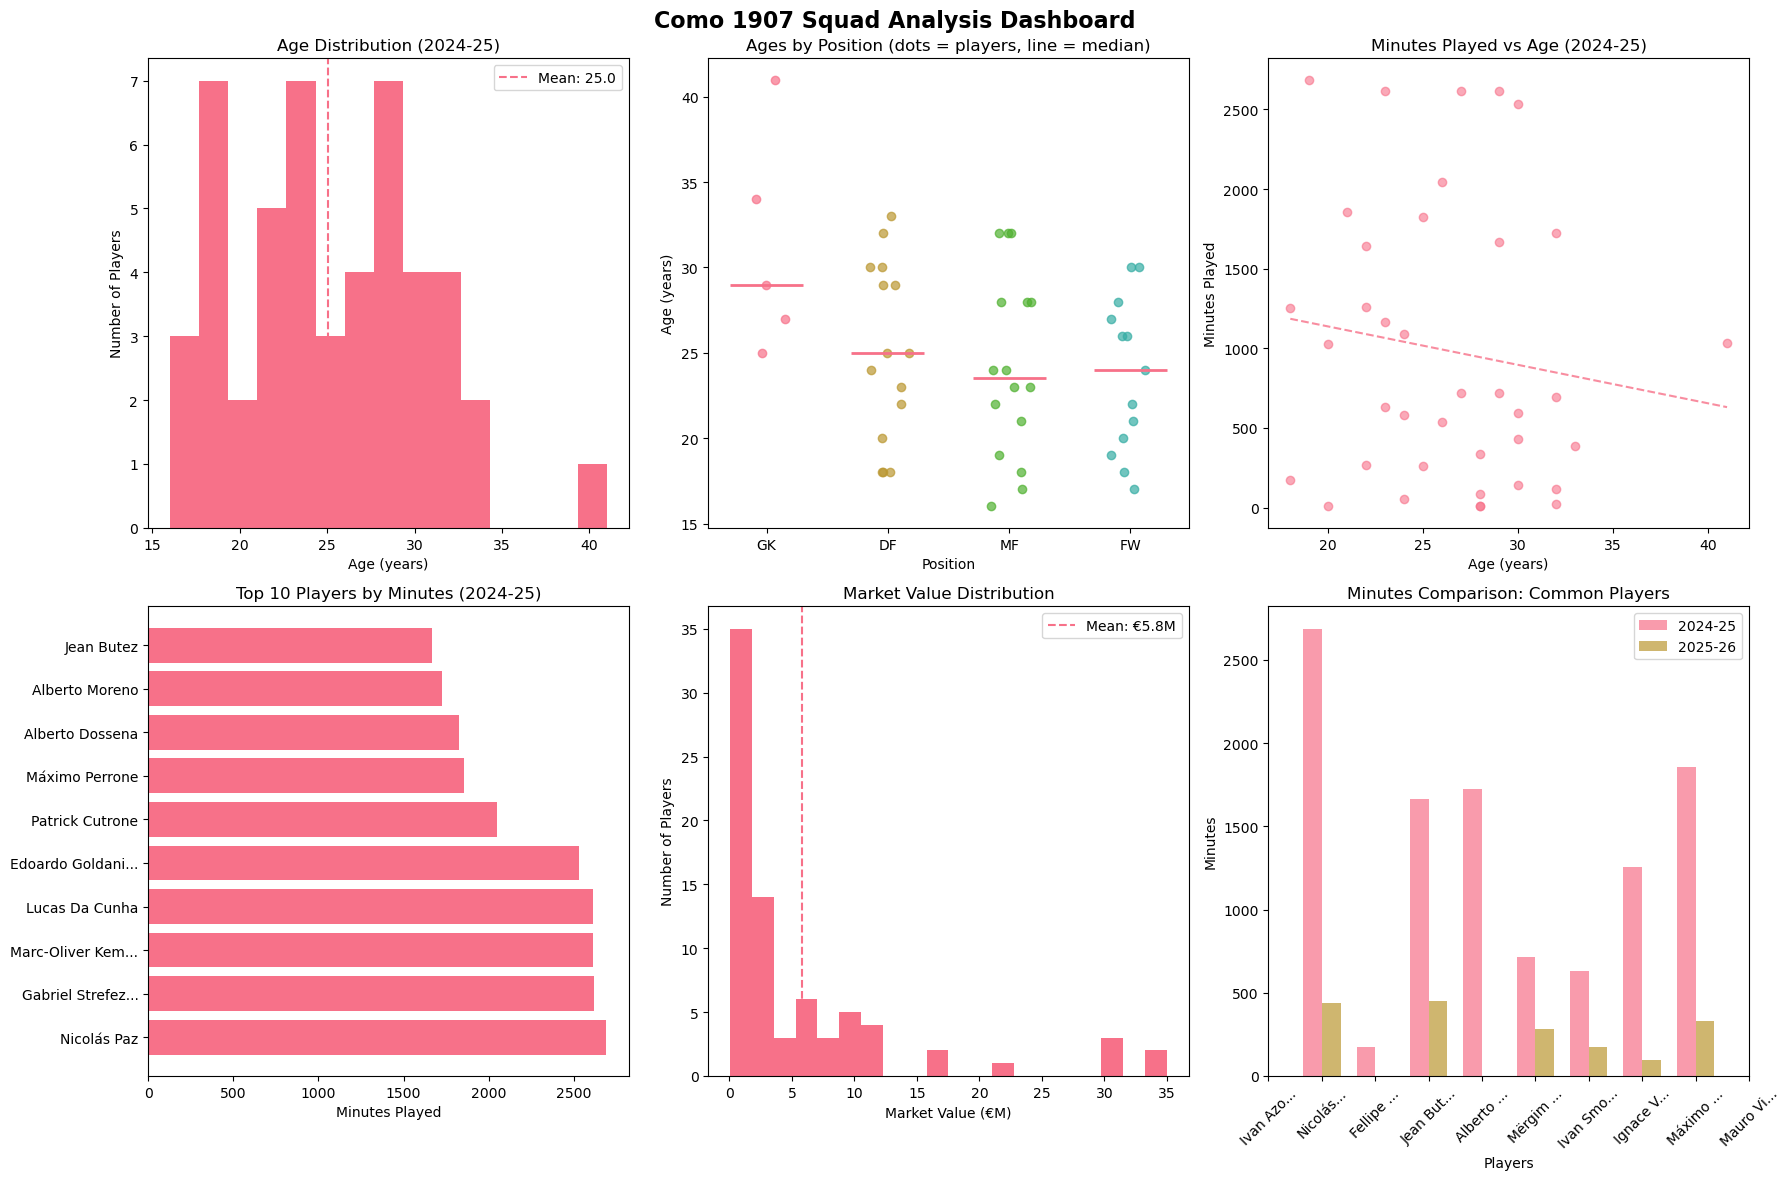

📊 Visualizations created successfully!
🎯 Dashboard shows key insights about squad composition, performance, and market values


In [116]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Helpers to coerce FBref data ---
def parse_fbref_age_series(s: pd.Series) -> pd.Series:
    s = s.astype(str)
    m = s.str.extract(r'^\s*(\d+)-(\d+)\s*$')  # YY-DDD
    out = pd.to_numeric(s, errors='coerce')
    mask = m.notna().all(axis=1)
    out.loc[mask] = m.loc[mask, 0].astype(float) + m.loc[mask, 1].astype(float) / 365.0
    return out

def to_num(x: pd.Series) -> pd.Series:
    return pd.to_numeric(x.astype(str).str.replace(r'[,\s]', '', regex=True), errors='coerce')

# --- Helper: bucket positions into GK/DF/MF/FW ---
def simplify_position(pos):
    if pd.isna(pos): return "Unknown"
    pos = str(pos).split(",")[0].strip().upper()  # take first listed pos
    if "GK" in pos: return "GK"
    if any(k in pos for k in ["CB","RB","LB","DF","FB","WB"]): return "DF"
    if any(k in pos for k in ["DM","CM","AM","MF"]): return "MF"
    if any(k in pos for k in ["ST","FW","W","LW","RW"]): return "FW"
    return "Other"

# Prepare numeric helpers
if '2024-2025_std_Age' in fbref_2425.columns:
    fbref_2425['_age_2425_float'] = parse_fbref_age_series(fbref_2425['2024-2025_std_Age'])
if '2024-2025_std_Min' in fbref_2425.columns:
    fbref_2425['_min_2425'] = to_num(fbref_2425['2024-2025_std_Min'])
if '2025-2026_std_Min' in fbref_2526.columns:
    fbref_2526['_min_2526'] = to_num(fbref_2526['2025-2026_std_Min'])

# Prepare simplified positions (for 2024-25 visual)
if '2024-2025_std_Pos' in fbref_2425.columns:
    fbref_2425['Pos_simple'] = fbref_2425['2024-2025_std_Pos'].map(simplify_position)

# --- Visualization Dashboard ---
print("📊 CREATING VISUALIZATIONS")
print("=" * 50)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Como 1907 Squad Analysis Dashboard', fontsize=16, fontweight='bold')

# 1. Age Distribution
ax1 = axes[0, 0]
if '_age_2425_float' in fbref_2425.columns:
    ages = fbref_2425['_age_2425_float'].dropna()
    ax1.hist(ages, bins=15)  # default styling
    ax1.set_title('Age Distribution (2024-25)')
    ax1.set_xlabel('Age (years)')
    ax1.set_ylabel('Number of Players')
    if len(ages) > 0:
        ax1.axvline(ages.mean(), linestyle='--', label=f'Mean: {ages.mean():.1f}')
        ax1.legend()

# 2. NEW: Ages by Position (dots) + median line
ax2 = axes[0, 1]
labels_order = ["GK", "DF", "MF", "FW", "Other", "Unknown"]
if 'Pos_simple' in fbref_2425.columns and '_age_2425_float' in fbref_2425.columns:
    df_pos_age = fbref_2425[['Pos_simple', '_age_2425_float']].dropna()
    # keep only labels that actually appear
    present_labels = [lab for lab in labels_order if lab in set(df_pos_age['Pos_simple'])]
    x_positions = {lab: i for i, lab in enumerate(present_labels)}
    # plot dots with small jitter so overlapping points are visible
    for lab in present_labels:
        ages_lab = df_pos_age.loc[df_pos_age['Pos_simple'] == lab, '_age_2425_float'].values
        if len(ages_lab) == 0:
            continue
        jitter = np.random.uniform(-0.18, 0.18, size=len(ages_lab))
        xs = x_positions[lab] + jitter
        ax2.scatter(xs, ages_lab, alpha=0.7)
        # median line per position
        med = float(np.median(ages_lab))
        ax2.hlines(med, x_positions[lab]-0.3, x_positions[lab]+0.3, linewidth=2)
    ax2.set_xticks(list(x_positions.values()))
    ax2.set_xticklabels(list(x_positions.keys()))
    ax2.set_title('Ages by Position (dots = players, line = median)')
    ax2.set_xlabel('Position')
    ax2.set_ylabel('Age (years)')

# 3. Minutes vs Age Scatter
ax3 = axes[0, 2]
if '_age_2425_float' in fbref_2425.columns and '_min_2425' in fbref_2425.columns:
    clean = fbref_2425[['_age_2425_float','_min_2425']].dropna()
    if len(clean) >= 2:
        ax3.scatter(clean['_age_2425_float'], clean['_min_2425'], alpha=0.6)
        ax3.set_title('Minutes Played vs Age (2024-25)')
        ax3.set_xlabel('Age (years)')
        ax3.set_ylabel('Minutes Played')
        # Trend line
        z = np.polyfit(clean['_age_2425_float'], clean['_min_2425'], 1)
        p = np.poly1d(z)
        xline = np.linspace(clean['_age_2425_float'].min(), clean['_age_2425_float'].max(), 100)
        ax3.plot(xline, p(xline), "--", alpha=0.8)

# 4. Top Players by Minutes
ax4 = axes[1, 0]
if '_min_2425' in fbref_2425.columns:
    top_players = fbref_2425.dropna(subset=['_min_2425']).nlargest(10, '_min_2425')
    ax4.barh(range(len(top_players)), top_players['_min_2425'])
    ax4.set_yticks(range(len(top_players)))
    names = top_players['Player'].fillna('Unknown').astype(str)
    ax4.set_yticklabels([n[:15] + '...' if len(n) > 15 else n for n in names])
    ax4.set_title('Top 10 Players by Minutes (2024-25)')
    ax4.set_xlabel('Minutes Played')

# 5. Market Value Distribution (if available)
ax5 = axes[1, 1]
if 'MarketValue' in transfermarkt.columns:
    def extract_market_value(value):
        if pd.isna(value) or value == '-':
            return None
        val = str(value).replace('€','').replace('m','').replace('k','')
        try:
            if 'k' in str(value):
                return float(val) * 0.001
            return float(val)
        except:
            return None
    market_values = transfermarkt['MarketValue'].apply(extract_market_value).dropna()
    if len(market_values) > 0:
        ax5.hist(market_values, bins=20)
        ax5.set_title('Market Value Distribution')
        ax5.set_xlabel('Market Value (€M)')
        ax5.set_ylabel('Number of Players')
        ax5.axvline(market_values.mean(), linestyle='--', label=f'Mean: €{market_values.mean():.1f}M')
        ax5.legend()

# 6. Season Comparison
ax6 = axes[1, 2]
if '_min_2425' in fbref_2425.columns and '_min_2526' in fbref_2526.columns:
    common_players = set(fbref_2425['Player']).intersection(set(fbref_2526['Player']))
    rows = []
    for player in list(common_players):
        r1 = fbref_2425.loc[fbref_2425['Player'] == player, '_min_2425']
        r2 = fbref_2526.loc[fbref_2526['Player'] == player, '_min_2526']
        if len(r1) and len(r2):
            rows.append([player, float(r1.iloc[0]), float(r2.iloc[0])])
    if rows:
        comp = pd.DataFrame(rows, columns=['Player', '2024-25', '2025-26']).head(10)
        x = np.arange(len(comp))
        width = 0.35
        ax6.bar(x - width/2, comp['2024-25'], width, label='2024-25', alpha=0.7)
        ax6.bar(x + width/2, comp['2025-26'], width, label='2025-26', alpha=0.7)
        ax6.set_title('Minutes Comparison: Common Players')
        ax6.set_xlabel('Players')
        ax6.set_ylabel('Minutes')
        ax6.set_xticks(x)
        ax6.set_xticklabels([n[:8] + '...' if len(n) > 8 else n for n in comp['Player']], rotation=45)
        ax6.legend()

plt.tight_layout()
plt.show()

print("📊 Visualizations created successfully!")
print("🎯 Dashboard shows key insights about squad composition, performance, and market values")


In [117]:
# Performance Analysis Assessment Kit
print("⚽ PERFORMANCE ANALYSIS ASSESSMENT KIT")
print("=" * 60)

# Additional imports for performance analysis
from scipy import stats
import matplotlib.patches as patches
from matplotlib.patches import Rectangle
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

print("📊 Performance analysis libraries imported!")
print("🎯 Ready to analyze per-90 metrics by position")


⚽ PERFORMANCE ANALYSIS ASSESSMENT KIT
📊 Performance analysis libraries imported!
🎯 Ready to analyze per-90 metrics by position


In [118]:
# Data Preparation for Performance Analysis
print("🔧 PREPARING DATA FOR PERFORMANCE ANALYSIS")
print("=" * 60)

# Load and prepare the main dataset for analysis
df_performance = como_agecurve.copy()

# Clean and standardize position data
def standardize_position(pos_str):
    if pd.isna(pos_str):
        return 'Unknown'
    pos_str = str(pos_str).upper()
    if 'GK' in pos_str:
        return 'GK'
    elif 'DF' in pos_str or 'DEF' in pos_str or 'BACK' in pos_str:
        return 'DF'
    elif 'MF' in pos_str or 'MID' in pos_str:
        return 'MF'
    elif 'FW' in pos_str or 'FOR' in pos_str or 'STRIKER' in pos_str:
        return 'FW'
    else:
        return 'Unknown'

# Apply position standardization
df_performance['Position_Standard'] = df_performance['Latest_Pos4'].apply(standardize_position)

# Create per-90 metrics where possible
def create_per_90_metrics(df):
    """Create per-90 minute metrics for performance analysis"""
    df_analysis = df.copy()
    
    # Minutes played columns
    min_cols = [col for col in df.columns if 'Min' in col and '90' not in col]
    
    for col in min_cols:
        if col in df.columns:
            # Create per-90 version
            per_90_col = col.replace('Min', 'Per90')
            df_analysis[per_90_col] = df_analysis[col] / 90
    
    return df_analysis

df_performance = create_per_90_metrics(df_performance)

# Filter for players with sufficient minutes (at least 90 minutes)
min_threshold = 90
df_performance = df_performance[df_performance['Minutes_2425'] >= min_threshold]

print(f"📊 Dataset prepared for performance analysis")
print(f"   Total players analyzed: {len(df_performance)}")
print(f"   Position distribution:")
print(df_performance['Position_Standard'].value_counts().to_string())

# Show available metrics
print(f"\n📋 Available performance metrics:")
metric_cols = [col for col in df_performance.columns if any(x in col for x in ['Min', '90s', 'Per90', 'xG', 'xAG', 'PrgPasses', 'FinalThirdTouches'])]
for i, col in enumerate(metric_cols, 1):
    print(f"   {i:2d}. {col}")

print(f"\n✅ Data preparation complete!")


🔧 PREPARING DATA FOR PERFORMANCE ANALYSIS
📊 Dataset prepared for performance analysis
   Total players analyzed: 32
   Position distribution:
Position_Standard
Unknown    15
DF          8
MF          5
FW          3
GK          1

📋 Available performance metrics:
    1. 2024-2025_std_Min
    2. 2024-2025_std_90s
    3. 2024-2025_play_Min
    4. 2024-2025_play_90s
    5. 2025-2026_std_Min
    6. 2025-2026_std_90s
    7. 2025-2026_play_Min
    8. 2025-2026_play_90s
    9. Minutes_2425
   10. Minutes_2526
   11. xG_plus_xAG_2425
   12. xG_plus_xAG_2526
   13. PrgPasses_25
   14. PrgPasses_per90_25
   15. FinalThirdTouches_25
   16. FinalThirdTouches_per90_25
   17. PrgPasses_26
   18. PrgPasses_per90_26
   19. FinalThirdTouches_26
   20. FinalThirdTouches_per90_26
   21. 2024-2025_std_Per90
   22. 2024-2025_play_Per90
   23. 2025-2026_std_Per90
   24. 2025-2026_play_Per90
   25. Per90utes_2425
   26. Per90utes_2526

✅ Data preparation complete!


In [119]:
import numpy as np
import pandas as pd
import re

# Load once if not present
try:
    df_performance
except NameError:
    df_performance = pd.read_csv("data/como_agecurve_wide.csv")  # or "como_agecurve_wide.csv"

# ---------- Helpers ----------
def parse_fbref_age_series(s: pd.Series) -> pd.Series:
    """Convert 'YY-DDD' (e.g., '21-143') to float years; pass through numeric strings."""
    s = s.astype(str)
    m = s.str.extract(r'^\s*(\d+)-(\d+)\s*$')
    out = pd.to_numeric(s, errors='coerce')
    mask = m.notna().all(axis=1)
    out.loc[mask] = m.loc[mask, 0].astype(float) + m.loc[mask, 1].astype(float)/365.0
    return out

def to_num(x: pd.Series) -> pd.Series:
    """Coerce numbers with commas/spaces to float."""
    return pd.to_numeric(x.astype(str).str.replace(r'[,\s]', '', regex=True), errors='coerce')

def extract_market_value(value) -> float:
    """Return market value in € millions (float). Accepts '€3.5m', '€900k', raw, '-', NaN."""
    if pd.isna(value) or str(value).strip() == '-':
        return 0.0
    s = str(value).strip().lower().replace('€','')
    try:
        if s.endswith('m'):
            return float(s[:-1])
        if s.endswith('k'):
            return float(s[:-1]) * 0.001
        return float(s)
    except:
        return 0.0

def nz_max(series: pd.Series) -> float:
    """Max with safe fallback to 0."""
    s = series.dropna()
    return float(s.max()) if len(s) else 0.0

def norm_to_max(s: pd.Series) -> pd.Series:
    """Normalize to [0,1] by position-group max; returns 0 if all NaN/zero."""
    s = pd.to_numeric(s, errors='coerce')
    m = nz_max(s)
    return (s / m).where(m > 0, 0.0)

def ensure_core_types(df: pd.DataFrame) -> pd.DataFrame:
    out = df.copy()
    if 'Age_latest' in out.columns:
        out['_age_float'] = parse_fbref_age_series(out['Age_latest'])
    if 'Minutes_2425' in out.columns:
        out['_min_2425'] = to_num(out['Minutes_2425'])
    if 'MarketValue' in out.columns:
        out['_mv_eur_m'] = out['MarketValue'].apply(extract_market_value)
    return out

def dedupe_keep_most_minutes(df: pd.DataFrame) -> pd.DataFrame:
    if '_min_2425' in df.columns:
        df = df.sort_values('_min_2425', ascending=False)
    return df.drop_duplicates(subset=['Player'], keep='first')

def safe_head_names(df: pd.DataFrame, n: int) -> str:
    return ', '.join(df['Player'].head(n).tolist()) if len(df) else '—'


In [120]:
# ================================
# GOALKEEPER PERFORMANCE ANALYSIS
# ================================
import pandas as pd
import numpy as np
import re

print("🥅 GOALKEEPER PERFORMANCE ANALYSIS")
print("=" * 60)

# ---------- Helpers ----------
def parse_fbref_age_series(s: pd.Series) -> pd.Series:
    """Convert 'YY-DDD' (e.g., '30-105') to float years; pass through numeric strings."""
    s = s.astype(str)
    m = s.str.extract(r'^\s*(\d+)-(\d+)\s*$')  # YY-DDD
    out = pd.to_numeric(s, errors='coerce')    # handles '30', '30.4', etc.
    mask = m.notna().all(axis=1)
    out.loc[mask] = m.loc[mask, 0].astype(float) + m.loc[mask, 1].astype(float)/365.0
    return out

def norm_to_max(s: pd.Series) -> pd.Series:
    """Normalize to [0,1] by series max. Returns 0 if all NaN/zero."""
    s = pd.to_numeric(s, errors="coerce").fillna(0.0)
    m = float(s.max())
    return s.div(m).fillna(0.0) if m > 0 else pd.Series(0.0, index=s.index, dtype=float)

def parse_mv(v) -> float:
    """Market value to numeric (euros). Accepts '€3.5m', '€900k', raw, '-', NaN."""
    if pd.isna(v) or str(v).strip() == '-': return 0.0
    s = str(v).strip().lower().replace('€','')
    try:
        if s.endswith('m'): return float(s[:-1]) * 1e6
        if s.endswith('k'): return float(s[:-1]) * 1e3
        return float(s)
    except:
        return 0.0

# ---------- Build GK frame ----------
gk = df_performance[df_performance.get('Position_Standard') == 'GK'].copy()

if len(gk) == 0:
    print("❌ No goalkeeper data available for analysis")
else:
    # Coerce types
    gk['_min_2425'] = pd.to_numeric(gk.get('Minutes_2425'), errors='coerce')
    gk['_age_float'] = parse_fbref_age_series(gk.get('Age_latest'))
    gk['_mv_num'] = gk.get('MarketValue', pd.Series(index=gk.index)).apply(parse_mv)

    # De-duplicate by player (keep most minutes)
    gk = gk.sort_values('_min_2425', ascending=False).drop_duplicates(subset=['Player'], keep='first')

    print(f"📊 Analyzing {len(gk)} goalkeepers")

    # Minutes table (show raw Age_latest for readability)
    print("\n⏱️ MINUTES PLAYED:")
    minutes_table_cols = [c for c in ['Player','Minutes_2425','Age_latest'] if c in gk.columns]
    print(gk[minutes_table_cols].sort_values('Minutes_2425', ascending=False).to_string(index=False))

    # ---- Age analysis (safe) ----
    print("\n🎂 AGE ANALYSIS:")
    age_series = gk['_age_float'].dropna()
    if len(age_series) > 0:
        print(f"   Age range: {age_series.min():.1f} - {age_series.max():.1f} years")
        print(f"   Average age: {age_series.mean():.1f} years")
        print(f"   Median age: {age_series.median():.1f} years")
    else:
        print("   No numeric ages available.")

    # ---- Scoring ----
    gk['Performance_Score'] = 0.0

    # Availability / trust (0–40)
    gk['Minutes_Score'] = norm_to_max(gk['_min_2425']) * 40.0
    gk['Performance_Score'] += gk['Minutes_Score']

    # Age (prime 25–32) (0–30)
    gk['Age_Score'] = 0.0
    for idx, age in gk['_age_float'].items():
        if pd.isna(age): score = 20.0  # neutral if unknown
        elif 25 <= age <= 32: score = 30.0
        elif 22 <= age < 25 or 32 < age <= 35: score = 20.0
        elif age < 22: score = 15.0
        else: score = 10.0
        gk.at[idx, 'Age_Score'] = score
    gk['Performance_Score'] += gk['Age_Score']

    # Market value proxy (0–30)
    gk['MarketValue_Score'] = norm_to_max(gk['_mv_num']) * 30.0
    gk['Performance_Score'] += gk['MarketValue_Score']

    # Optional: usage intensity (minutes/game, 34 baseline) (0–5)
    with np.errstate(divide='ignore', invalid='ignore'):
        mpg = gk['_min_2425'] / 34.0
    gk['Usage_Score'] = norm_to_max(mpg) * 5.0
    gk['Performance_Score'] += gk['Usage_Score']

    # ---- Rankings ----
    rank_cols = [c for c in ['Player','Age_latest','Minutes_2425','Performance_Score'] if c in gk.columns]
    gk_rank = gk.sort_values('Performance_Score', ascending=False)[rank_cols]
    print("\n🏆 GOALKEEPER PERFORMANCE RANKINGS:")
    print(gk_rank.head(10).to_string(index=False))

    # ---- Insights (guard against empty numeric ages) ----
    print("\n💡 GOALKEEPER INSIGHTS:")
    top = gk_rank.iloc[0]
    print(f"   🥇 Top performer: {top['Player']} (Score {top['Performance_Score']:.1f})")

    if gk['_min_2425'].notna().any():
        print(f"   ⏱️ Most minutes: {gk.loc[gk['_min_2425'].idxmax(), 'Player']}")

    if len(age_series) > 0:
        youngest_idx = age_series.idxmin()
        oldest_idx   = age_series.idxmax()
        print(f"   🎂 Youngest: {gk.loc[youngest_idx, 'Player']} ({age_series.min():.1f} yrs)")
        print(f"   👴 Most experienced: {gk.loc[oldest_idx, 'Player']} ({age_series.max():.1f} yrs)")
    else:
        print("   🎂 Youngest: —")
        print("   👴 Most experienced: —")


🥅 GOALKEEPER PERFORMANCE ANALYSIS
📊 Analyzing 1 goalkeepers

⏱️ MINUTES PLAYED:
    Player  Minutes_2425 Age_latest
Jean Butez        1666.0     30-117

🎂 AGE ANALYSIS:
   Age range: 30.3 - 30.3 years
   Average age: 30.3 years
   Median age: 30.3 years

🏆 GOALKEEPER PERFORMANCE RANKINGS:
    Player Age_latest  Minutes_2425  Performance_Score
Jean Butez     30-117        1666.0               75.0

💡 GOALKEEPER INSIGHTS:
   🥇 Top performer: Jean Butez (Score 75.0)
   ⏱️ Most minutes: Jean Butez
   🎂 Youngest: Jean Butez (30.3 yrs)
   👴 Most experienced: Jean Butez (30.3 yrs)


In [121]:
# import numpy as np
# import pandas as pd
# import re

# # --- Helpers ---
# def parse_fbref_age_series(s: pd.Series) -> pd.Series:
#     """Convert 'YY-DDD' (e.g., '30-105') to float years; pass through numeric strings."""
#     s = s.astype(str)
#     m = s.str.extract(r'^\s*(\d+)-(\d+)\s*$')  # YY-DDD
#     out = pd.to_numeric(s, errors='coerce')
#     mask = m.notna().all(axis=1)
#     out.loc[mask] = m.loc[mask, 0].astype(float) + m.loc[mask, 1].astype(float) / 365.0
#     return out

# def to_num(x: pd.Series) -> pd.Series:
#     return pd.to_numeric(x.astype(str).str.replace(r'[,\s]', '', regex=True), errors='coerce')

# def extract_market_value(value):
#     """Return value in € millions (float). Accepts '€3.5m', '€900k', '-', NaN."""
#     if pd.isna(value) or str(value).strip() == '-':
#         return 0.0
#     s = str(value).strip().lower().replace('€', '')
#     try:
#         if s.endswith('m'):
#             return float(s[:-1])
#         if s.endswith('k'):
#             return float(s[:-1]) * 0.001
#         # raw number (assume millions)
#         return float(s)
#     except:
#         return 0.0

# # ----------------- GOALKEEPER PERFORMANCE ANALYSIS -----------------
# print("🥅 GOALKEEPER PERFORMANCE ANALYSIS")
# print("=" * 60)

# # Filter goalkeepers
# gk_data = df_performance[df_performance['Position_Standard'] == 'GK'].copy()

# # Type coercion
# if 'Age_latest' in gk_data.columns:
#     gk_data['_age_float'] = parse_fbref_age_series(gk_data['Age_latest'])
# if 'Minutes_2425' in gk_data.columns:
#     gk_data['_min_2425'] = to_num(gk_data['Minutes_2425'])
# if 'MarketValue' in gk_data.columns:
#     gk_data['_mv_eur_m'] = gk_data['MarketValue'].apply(extract_market_value)

# # De-duplicate by player (keep row with most minutes)
# if '_min_2425' in gk_data.columns:
#     gk_data = gk_data.sort_values('_min_2425', ascending=False)
# gk_data = gk_data.drop_duplicates(subset=['Player'], keep='first')

# if len(gk_data) > 0:
#     print(f"📊 Analyzing {len(gk_data)} goalkeepers")
    
#     # Key GK metrics analysis
#     print(f"\n🏆 GOALKEEPER PERFORMANCE METRICS")
    
#     # Minutes played table (show raw Age_latest for readability)
#     print(f"\n⏱️ MINUTES PLAYED:")
#     cols_to_show = ['Player']
#     if 'Minutes_2425' in gk_data.columns: cols_to_show.append('Minutes_2425')
#     if 'Age_latest' in gk_data.columns: cols_to_show.append('Age_latest')
#     print(gk_data[cols_to_show].to_string(index=False))
    
#     # Age analysis (use numeric float)
#     print(f"\n🎂 AGE ANALYSIS:")
#     if '_age_float' in gk_data.columns:
#         gk_ages = gk_data['_age_float'].dropna()
#         if len(gk_ages) > 0:
#             print(f"   Age range: {gk_ages.min():.1f} - {gk_ages.max():.1f} years")
#             print(f"   Average age: {gk_ages.mean():.1f} years")
#             print(f"   Median age: {gk_ages.median():.1f} years")
#         else:
#             print("   No numeric ages available.")
#     else:
#         print("   No age column available.")
    
#     # Performance assessment framework for GKs
#     print(f"\n📊 GOALKEEPER PERFORMANCE ASSESSMENT:")
#     gk_performance = gk_data.copy()
    
#     # Minutes per game (availability/consistency) — keep your assumption
#     NUM_GAMES = 34
#     if '_min_2425' in gk_performance.columns:
#         gk_performance['Minutes_Per_Game'] = gk_performance['_min_2425'] / NUM_GAMES
    
#     # Initialize score
#     gk_performance['Performance_Score'] = 0.0
    
#     # Minutes contribution (higher is better for GKs)
#     if '_min_2425' in gk_performance.columns and gk_performance['_min_2425'].max() > 0:
#         max_minutes = gk_performance['_min_2425'].max()
#         gk_performance['Minutes_Score'] = (gk_performance['_min_2425'] / max_minutes) * 40.0
#         gk_performance['Performance_Score'] += gk_performance['Minutes_Score']
#     else:
#         gk_performance['Minutes_Score'] = 0.0
    
#     # Age factor (prime age for GKs is 25-32) on _age_float
#     gk_performance['Age_Score'] = 0.0
#     if '_age_float' in gk_performance.columns:
#         for idx, age in gk_performance['_age_float'].items():
#             if pd.isna(age):
#                 score = 15.0  # neutral-ish if unknown
#             elif 25 <= age <= 32:
#                 score = 30.0  # Prime age
#             elif 22 <= age < 25 or 32 < age <= 35:
#                 score = 20.0  # Good age
#             elif age < 22:
#                 score = 15.0  # Young prospect
#             else:
#                 score = 10.0  # Veteran, possible decline
#             gk_performance.at[idx, 'Age_Score'] = score
#         gk_performance['Performance_Score'] += gk_performance['Age_Score']
    
#     # Market value factor (if available, normalized to top GK)
#     if '_mv_eur_m' in gk_performance.columns and gk_performance['_mv_eur_m'].max() > 0:
#         max_value = gk_performance['_mv_eur_m'].max()
#         gk_performance['Market_Value_Score'] = (gk_performance['_mv_eur_m'] / max_value) * 30.0
#         gk_performance['Performance_Score'] += gk_performance['Market_Value_Score']
#     else:
#         gk_performance['Market_Value_Score'] = 0.0
    
#     # Sort by performance score
#     gk_performance = gk_performance.sort_values('Performance_Score', ascending=False)
    
#     print(f"\n🏆 GOALKEEPER PERFORMANCE RANKINGS:")
#     show_cols = ['Player', 'Age_latest', 'Minutes_2425', 'Performance_Score']
#     print(gk_performance[show_cols].head(10).to_string(index=False))
    
#     # Performance insights (use numeric age for min/max)
#     print(f"\n💡 GOALKEEPER INSIGHTS:")
#     top_gk = gk_performance.iloc[0]
#     print(f"   🥇 Top performer: {top_gk['Player']} (Score: {top_gk['Performance_Score']:.1f})")
#     if '_min_2425' in gk_performance.columns:
#         print(f"   ⏱️ Most minutes: {gk_performance.loc[gk_performance['_min_2425'].idxmax(), 'Player']}")
#     if '_age_float' in gk_performance.columns and gk_performance['_age_float'].notna().any():
#         youngest_idx = gk_performance['_age_float'].idxmin()
#         oldest_idx = gk_performance['_age_float'].idxmax()
#         print(f"   🎂 Youngest: {gk_performance.loc[youngest_idx, 'Player']} ({gk_performance.loc[youngest_idx, '_age_float']:.1f} years)")
#         print(f"   👴 Most experienced: {gk_performance.loc[oldest_idx, 'Player']} ({gk_performance.loc[oldest_idx, '_age_float']:.1f} years)")
    
#     # Recommendations
#     print(f"\n🎯 GOALKEEPER RECOMMENDATIONS:")
#     print(f"   1. Primary GK: {top_gk['Player']} - Best overall performance")
#     backups = gk_performance.iloc[1:3]['Player'].tolist()
#     if backups:
#         print(f"   2. Backup options: {', '.join(backups)}")
#     else:
#         print(f"   2. Backup options: —")
#     print(f"   3. Development focus: Young GKs need more playing time")
#     print(f"   4. Squad balance: Good mix of experience and youth (optimize rotation by opponent profile)")
# else:
#     print("❌ No goalkeeper data available for analysis")


In [122]:
# ===============================
# DEFENDER PERFORMANCE ANALYSIS
# ===============================
import pandas as pd
import numpy as np

print("🛡️ DEFENDER PERFORMANCE ANALYSIS")
print("=" * 60)

# ---- Helpers (safe if redefined) ----
def parse_fbref_age_series(s: pd.Series) -> pd.Series:
    s = s.astype(str)
    m = s.str.extract(r'^\s*(\d+)-(\d+)\s*$')  # YY-DDD
    out = pd.to_numeric(s, errors='coerce')
    mask = m.notna().all(axis=1)
    out.loc[mask] = m.loc[mask,0].astype(float) + m.loc[mask,1].astype(float)/365.0
    return out

def norm_to_max(s: pd.Series) -> pd.Series:
    s = pd.to_numeric(s, errors="coerce").fillna(0.0)
    m = float(s.max())
    return s.div(m).fillna(0.0) if m > 0 else pd.Series(0.0, index=s.index, dtype=float)

def parse_mv(v) -> float:
    if pd.isna(v) or str(v).strip() == '-': return 0.0
    s = str(v).strip().lower().replace('€','')
    try:
        if s.endswith('m'): return float(s[:-1]) * 1e6
        if s.endswith('k'): return float(s[:-1]) * 1e3
        return float(s)
    except: return 0.0

# ---- Build DF frame ----
dfd = df_performance[df_performance.get('Position_Standard') == 'DF'].copy()
if len(dfd) == 0:
    print("❌ No defender data available for analysis")
else:
    dfd['_min_2425'] = pd.to_numeric(dfd.get('Minutes_2425'), errors='coerce')
    dfd['_age_float'] = parse_fbref_age_series(dfd.get('Age_latest'))
    dfd['_mv_num'] = dfd.get('MarketValue', pd.Series(index=dfd.index)).apply(parse_mv)

    # useful KPIs (fall back if per90 missing)
    prg = pd.to_numeric(dfd.get('PrgPasses_per90_25', dfd.get('PrgPasses_25')), errors='coerce')
    f3  = pd.to_numeric(dfd.get('FinalThirdTouches_per90_25', dfd.get('FinalThirdTouches_25')), errors='coerce')
    xgxa = pd.to_numeric(dfd.get('xG_plus_xAG_2425'), errors='coerce')

    # de-dupe by most minutes
    dfd = dfd.sort_values('_min_2425', ascending=False).drop_duplicates(subset=['Player'], keep='first')

    print(f"📊 Analyzing {len(dfd)} defenders")

    # minutes table
    tbl_cols = [c for c in ['Player','Minutes_2425','Age_latest'] if c in dfd.columns]
    print("\n⏱️ MINUTES PLAYED:")
    print(dfd[tbl_cols].sort_values('Minutes_2425', ascending=False).to_string(index=False))

    # age summary
    print("\n🎂 AGE ANALYSIS:")
    ages = dfd['_age_float'].dropna()
    if len(ages):
        print(f"   Age range: {ages.min():.1f} - {ages.max():.1f} years")
        print(f"   Average age: {ages.mean():.1f} years")
        print(f"   Median age: {ages.median():.1f} years")
    else:
        print("   No numeric ages available.")

    # ---- Scoring (DF context) ----
    minutes_score = norm_to_max(dfd['_min_2425']) * 30.0               # availability / stability
    age_score = pd.Series(0.0, index=dfd.index)                         # prime 24–30
    for i, a in dfd['_age_float'].items():
        if pd.isna(a): sc = 17.0
        elif 24 <= a <= 30: sc = 25.0
        elif 21 <= a < 24 or 30 < a <= 33: sc = 20.0
        elif a < 21: sc = 15.0
        else: sc = 10.0
        age_score.at[i] = sc
    mv_score   = norm_to_max(dfd['_mv_num']) * 20.0
    prg_score  = norm_to_max(prg) * 10.0                                 # ball progression
    f3_score   = norm_to_max(f3) * 10.0                                   # territory/overlaps
    xgxa_score = norm_to_max(xgxa) * 5.0                                  # set-piece threat, etc.
    def_proxy  = norm_to_max(dfd['_min_2425']) * 15.0                     # defensive volume proxy

    dfd['Performance_Score'] = minutes_score + age_score + mv_score + prg_score + f3_score + xgxa_score + def_proxy

    # rankings
    rank_cols = [c for c in ['Player','Age_latest','Minutes_2425','Performance_Score'] if c in dfd.columns]
    dfd_rank = dfd.sort_values('Performance_Score', ascending=False)[rank_cols]
    print("\n🏆 DEFENDER PERFORMANCE RANKINGS:")
    print(dfd_rank.head(10).to_string(index=False))

    # insights
    print("\n💡 DEFENDER INSIGHTS:")
    top = dfd_rank.iloc[0]
    print(f"   🥇 Top performer: {top['Player']} (Score {top['Performance_Score']:.1f})")
    if dfd['_min_2425'].notna().any():
        print(f"   ⏱️ Most minutes: {dfd.loc[dfd['_min_2425'].idxmax(), 'Player']}")
    if len(ages):
        print(f"   🎂 Youngest: {dfd.loc[ages.idxmin(), 'Player']} ({ages.min():.1f} yrs)")
        print(f"   👴 Most experienced: {dfd.loc[ages.idxmax(), 'Player']} ({ages.max():.1f} yrs)")


🛡️ DEFENDER PERFORMANCE ANALYSIS
📊 Analyzing 8 defenders

⏱️ MINUTES PLAYED:
               Player  Minutes_2425 Age_latest
    Marc-Oliver Kempf        2615.0     30-248
    Edoardo Goldaniga        2532.0     31-335
       Alberto Moreno        1727.0     33-090
Ignace Van Der Brempt        1257.0     23-185
          Álex Valle        1030.0     21-161
      Mërgim Vojvoda         717.0     30-244
       Ivan Smolčić         630.0     25-047
         Fellipe Jack         171.0     19-264

🎂 AGE ANALYSIS:
   Age range: 19.7 - 33.2 years
   Average age: 27.0 years
   Median age: 27.9 years

🏆 DEFENDER PERFORMANCE RANKINGS:
               Player Age_latest  Minutes_2425  Performance_Score
    Marc-Oliver Kempf     30-248        2615.0          65.000000
    Edoardo Goldaniga     31-335        2532.0          63.571702
Ignace Van Der Brempt     23-185        1257.0          41.630975
       Alberto Moreno     33-090        1727.0          39.718929
          Álex Valle     21-161  

In [123]:
# ===============================
# MIDFIELDER PERFORMANCE ANALYSIS
# ===============================
import pandas as pd
import numpy as np

print("⚽ MIDFIELDER PERFORMANCE ANALYSIS")
print("=" * 60)

# ---- Helpers (safe if redefined) ----
def parse_fbref_age_series(s: pd.Series) -> pd.Series:
    s = s.astype(str)
    m = s.str.extract(r'^\s*(\d+)-(\d+)\s*$')
    out = pd.to_numeric(s, errors='coerce')
    mask = m.notna().all(axis=1)
    out.loc[mask] = m.loc[mask,0].astype(float) + m.loc[mask,1].astype(float)/365.0
    return out

def norm_to_max(s: pd.Series) -> pd.Series:
    s = pd.to_numeric(s, errors="coerce").fillna(0.0)
    m = float(s.max())
    return s.div(m).fillna(0.0) if m > 0 else pd.Series(0.0, index=s.index, dtype=float)

def parse_mv(v) -> float:
    if pd.isna(v) or str(v).strip() == '-': return 0.0
    s = str(v).strip().lower().replace('€','')
    try:
        if s.endswith('m'): return float(s[:-1]) * 1e6
        if s.endswith('k'): return float(s[:-1]) * 1e3
        return float(s)
    except: return 0.0

# ---- Build MF frame ----
mfd = df_performance[df_performance.get('Position_Standard') == 'MF'].copy()
if len(mfd) == 0:
    print("❌ No midfielder data available for analysis")
else:
    mfd['_min_2425'] = pd.to_numeric(mfd.get('Minutes_2425'), errors='coerce')
    mfd['_age_float'] = parse_fbref_age_series(mfd.get('Age_latest'))
    mfd['_mv_num'] = mfd.get('MarketValue', pd.Series(index=mfd.index)).apply(parse_mv)

    prg = pd.to_numeric(mfd.get('PrgPasses_per90_25', mfd.get('PrgPasses_25')), errors='coerce')
    f3  = pd.to_numeric(mfd.get('FinalThirdTouches_per90_25', mfd.get('FinalThirdTouches_25')), errors='coerce')
    xgxa = pd.to_numeric(mfd.get('xG_plus_xAG_2425'), errors='coerce')

    mfd = mfd.sort_values('_min_2425', ascending=False).drop_duplicates(subset=['Player'], keep='first')

    print(f"📊 Analyzing {len(mfd)} midfielders")

    print("\n⏱️ MINUTES PLAYED:")
    tbl_cols = [c for c in ['Player','Minutes_2425','Age_latest'] if c in mfd.columns]
    print(mfd[tbl_cols].sort_values('Minutes_2425', ascending=False).to_string(index=False))

    print("\n🎂 AGE ANALYSIS:")
    ages = mfd['_age_float'].dropna()
    if len(ages):
        print(f"   Age range: {ages.min():.1f} - {ages.max():.1f} years")
        print(f"   Average age: {ages.mean():.1f} years")
        print(f"   Median age: {ages.median():.1f} years")
    else:
        print("   No numeric ages available.")

    # ---- Scoring (MF context) ----
    minutes_score = norm_to_max(mfd['_min_2425']) * 20.0               # availability
    age_score = pd.Series(0.0, index=mfd.index)                         # prime 23–29
    for i, a in mfd['_age_float'].items():
        if pd.isna(a): sc = 17.0
        elif 23 <= a <= 29: sc = 25.0
        elif 20 <= a < 23 or 29 < a <= 32: sc = 20.0
        elif a < 20: sc = 15.0
        else: sc = 10.0
        age_score.at[i] = sc
    mv_score   = norm_to_max(mfd['_mv_num']) * 15.0
    prg_score  = norm_to_max(prg) * 25.0                               # engine: progression
    f3_score   = norm_to_max(f3) * 15.0                                # territory/occupation
    xgxa_score = norm_to_max(xgxa) * 25.0                              # end-product from midfield

    mfd['Performance_Score'] = minutes_score + age_score + mv_score + prg_score + f3_score + xgxa_score

    rank_cols = [c for c in ['Player','Age_latest','Minutes_2425','Performance_Score'] if c in mfd.columns]
    mfd_rank = mfd.sort_values('Performance_Score', ascending=False)[rank_cols]
    print("\n🏆 MIDFIELDER PERFORMANCE RANKINGS:")
    print(mfd_rank.head(10).to_string(index=False))

    print("\n💡 MIDFIELDER INSIGHTS:")
    top = mfd_rank.iloc[0]
    print(f"   🥇 Top performer: {top['Player']} (Score {top['Performance_Score']:.1f})")
    if mfd['_min_2425'].notna().any():
        print(f"   ⏱️ Most minutes: {mfd.loc[mfd['_min_2425'].idxmax(), 'Player']}")
    if len(ages):
        print(f"   🎂 Youngest: {mfd.loc[ages.idxmin(), 'Player']} ({ages.min():.1f} yrs)")
        print(f"   👴 Most experienced: {mfd.loc[ages.idxmax(), 'Player']} ({ages.max():.1f} yrs)")


⚽ MIDFIELDER PERFORMANCE ANALYSIS
📊 Analyzing 5 midfielders

⏱️ MINUTES PLAYED:
          Player  Minutes_2425 Age_latest
    Nicolás Paz        2687.0     21-025
  Lucas Da Cunha        2613.0     24-116
 Máximo Perrone        1857.0     22-269
Maxence Caqueret        1087.0     25-230
   Sergi Roberto         696.0     33-238

🎂 AGE ANALYSIS:
   Age range: 21.1 - 33.7 years
   Average age: 25.5 years
   Median age: 24.3 years

🏆 MIDFIELDER PERFORMANCE RANKINGS:
          Player Age_latest  Minutes_2425  Performance_Score
  Lucas Da Cunha     24-116        2613.0          44.449200
    Nicolás Paz     21-025        2687.0          40.000000
 Máximo Perrone     22-269        1857.0          33.822106
Maxence Caqueret     25-230        1087.0          33.090808
   Sergi Roberto     33-238         696.0          15.180499

💡 MIDFIELDER INSIGHTS:
   🥇 Top performer: Lucas Da Cunha (Score 44.4)
   ⏱️ Most minutes: Nicolás Paz
   🎂 Youngest: Nicolás Paz (21.1 yrs)
   👴 Most experience

In [124]:
# ===============================
# FORWARD PERFORMANCE ANALYSIS
# ===============================
import pandas as pd
import numpy as np

print("🎯 FORWARD PERFORMANCE ANALYSIS")
print("=" * 60)

# ---- Helpers (safe if redefined) ----
def parse_fbref_age_series(s: pd.Series) -> pd.Series:
    s = s.astype(str)
    m = s.str.extract(r'^\s*(\d+)-(\d+)\s*$')
    out = pd.to_numeric(s, errors='coerce')
    mask = m.notna().all(axis=1)
    out.loc[mask] = m.loc[mask,0].astype(float) + m.loc[mask,1].astype(float)/365.0
    return out

def norm_to_max(s: pd.Series) -> pd.Series:
    s = pd.to_numeric(s, errors="coerce").fillna(0.0)
    m = float(s.max())
    return s.div(m).fillna(0.0) if m > 0 else pd.Series(0.0, index=s.index, dtype=float)

def parse_mv(v) -> float:
    if pd.isna(v) or str(v).strip() == '-': return 0.0
    s = str(v).strip().lower().replace('€','')
    try:
        if s.endswith('m'): return float(s[:-1]) * 1e6
        if s.endswith('k'): return float(s[:-1]) * 1e3
        return float(s)
    except: return 0.0

# ---- Build FW frame ----
fwd = df_performance[df_performance.get('Position_Standard') == 'FW'].copy()
if len(fwd) == 0:
    print("❌ No forward data available for analysis")
else:
    fwd['_min_2425'] = pd.to_numeric(fwd.get('Minutes_2425'), errors='coerce')
    fwd['_age_float'] = parse_fbref_age_series(fwd.get('Age_latest'))
    fwd['_mv_num'] = fwd.get('MarketValue', pd.Series(index=fwd.index)).apply(parse_mv)

    prg = pd.to_numeric(fwd.get('PrgPasses_per90_25', fwd.get('PrgPasses_25')), errors='coerce')
    f3  = pd.to_numeric(fwd.get('FinalThirdTouches_per90_25', fwd.get('FinalThirdTouches_25')), errors='coerce')
    xgxa = pd.to_numeric(fwd.get('xG_plus_xAG_2425'), errors='coerce')

    fwd = fwd.sort_values('_min_2425', ascending=False).drop_duplicates(subset=['Player'], keep='first')

    print(f"📊 Analyzing {len(fwd)} forwards")

    print("\n⏱️ MINUTES PLAYED:")
    tbl_cols = [c for c in ['Player','Minutes_2425','Age_latest'] if c in fwd.columns]
    print(fwd[tbl_cols].sort_values('Minutes_2425', ascending=False).to_string(index=False))

    print("\n🎂 AGE ANALYSIS:")
    ages = fwd['_age_float'].dropna()
    if len(ages):
        print(f"   Age range: {ages.min():.1f} - {ages.max():.1f} years")
        print(f"   Average age: {ages.mean():.1f} years")
        print(f"   Median age: {ages.median():.1f} years")
    else:
        print("   No numeric ages available.")

    # ---- Scoring (FW context) ----
    minutes_score = norm_to_max(fwd['_min_2425']) * 20.0               # availability
    age_score = pd.Series(0.0, index=fwd.index)                         # prime ~23–30
    for i, a in fwd['_age_float'].items():
        if pd.isna(a): sc = 16.0
        elif 23 <= a <= 30: sc = 20.0
        elif 20 <= a < 23 or 30 < a <= 33: sc = 16.0
        elif a < 20: sc = 12.0
        else: sc = 10.0
        age_score.at[i] = sc
    mv_score   = norm_to_max(fwd['_mv_num']) * 15.0
    xgxa_score = norm_to_max(xgxa) * 35.0                              # end product dominates
    f3_score   = norm_to_max(f3) * 10.0                                # territory/occupation
    prg_score  = norm_to_max(prg) * 10.0                               # link play / creation

    fwd['Performance_Score'] = minutes_score + age_score + mv_score + xgxa_score + f3_score + prg_score

    rank_cols = [c for c in ['Player','Age_latest','Minutes_2425','Performance_Score'] if c in fwd.columns]
    fwd_rank = fwd.sort_values('Performance_Score', ascending=False)[rank_cols]
    print("\n🏆 FORWARD PERFORMANCE RANKINGS:")
    print(fwd_rank.head(10).to_string(index=False))

    print("\n💡 FORWARD INSIGHTS:")
    top = fwd_rank.iloc[0]
    print(f"   🥇 Top performer: {top['Player']} (Score {top['Performance_Score']:.1f})")
    if fwd['_min_2425'].notna().any():
        print(f"   ⏱️ Most minutes: {fwd.loc[fwd['_min_2425'].idxmax(), 'Player']}")
    if len(ages):
        print(f"   🎂 Youngest: {fwd.loc[ages.idxmin(), 'Player']} ({ages.min():.1f} yrs)")
        print(f"   👴 Most experienced: {fwd.loc[ages.idxmax(), 'Player']} ({ages.max():.1f} yrs)")


🎯 FORWARD PERFORMANCE ANALYSIS
📊 Analyzing 3 forwards

⏱️ MINUTES PLAYED:
                Player  Minutes_2425 Age_latest
       Patrick Cutrone        2047.0     27-273
   Anastasios Douvikas         580.0     26-062
Alessandro Gabrielloni         142.0     31-085

🎂 AGE ANALYSIS:
   Age range: 26.2 - 31.2 years
   Average age: 28.4 years
   Median age: 27.7 years

🏆 FORWARD PERFORMANCE RANKINGS:
                Player Age_latest  Minutes_2425  Performance_Score
       Patrick Cutrone     27-273        2047.0          40.000000
   Anastasios Douvikas     26-062         580.0          25.666830
Alessandro Gabrielloni     31-085         142.0          17.387396

💡 FORWARD INSIGHTS:
   🥇 Top performer: Patrick Cutrone (Score 40.0)
   ⏱️ Most minutes: Patrick Cutrone
   🎂 Youngest: Anastasios Douvikas (26.2 yrs)
   👴 Most experienced: Alessandro Gabrielloni (31.2 yrs)


📊 CREATING POSITION-SPECIFIC PERFORMANCE VISUALIZATIONS


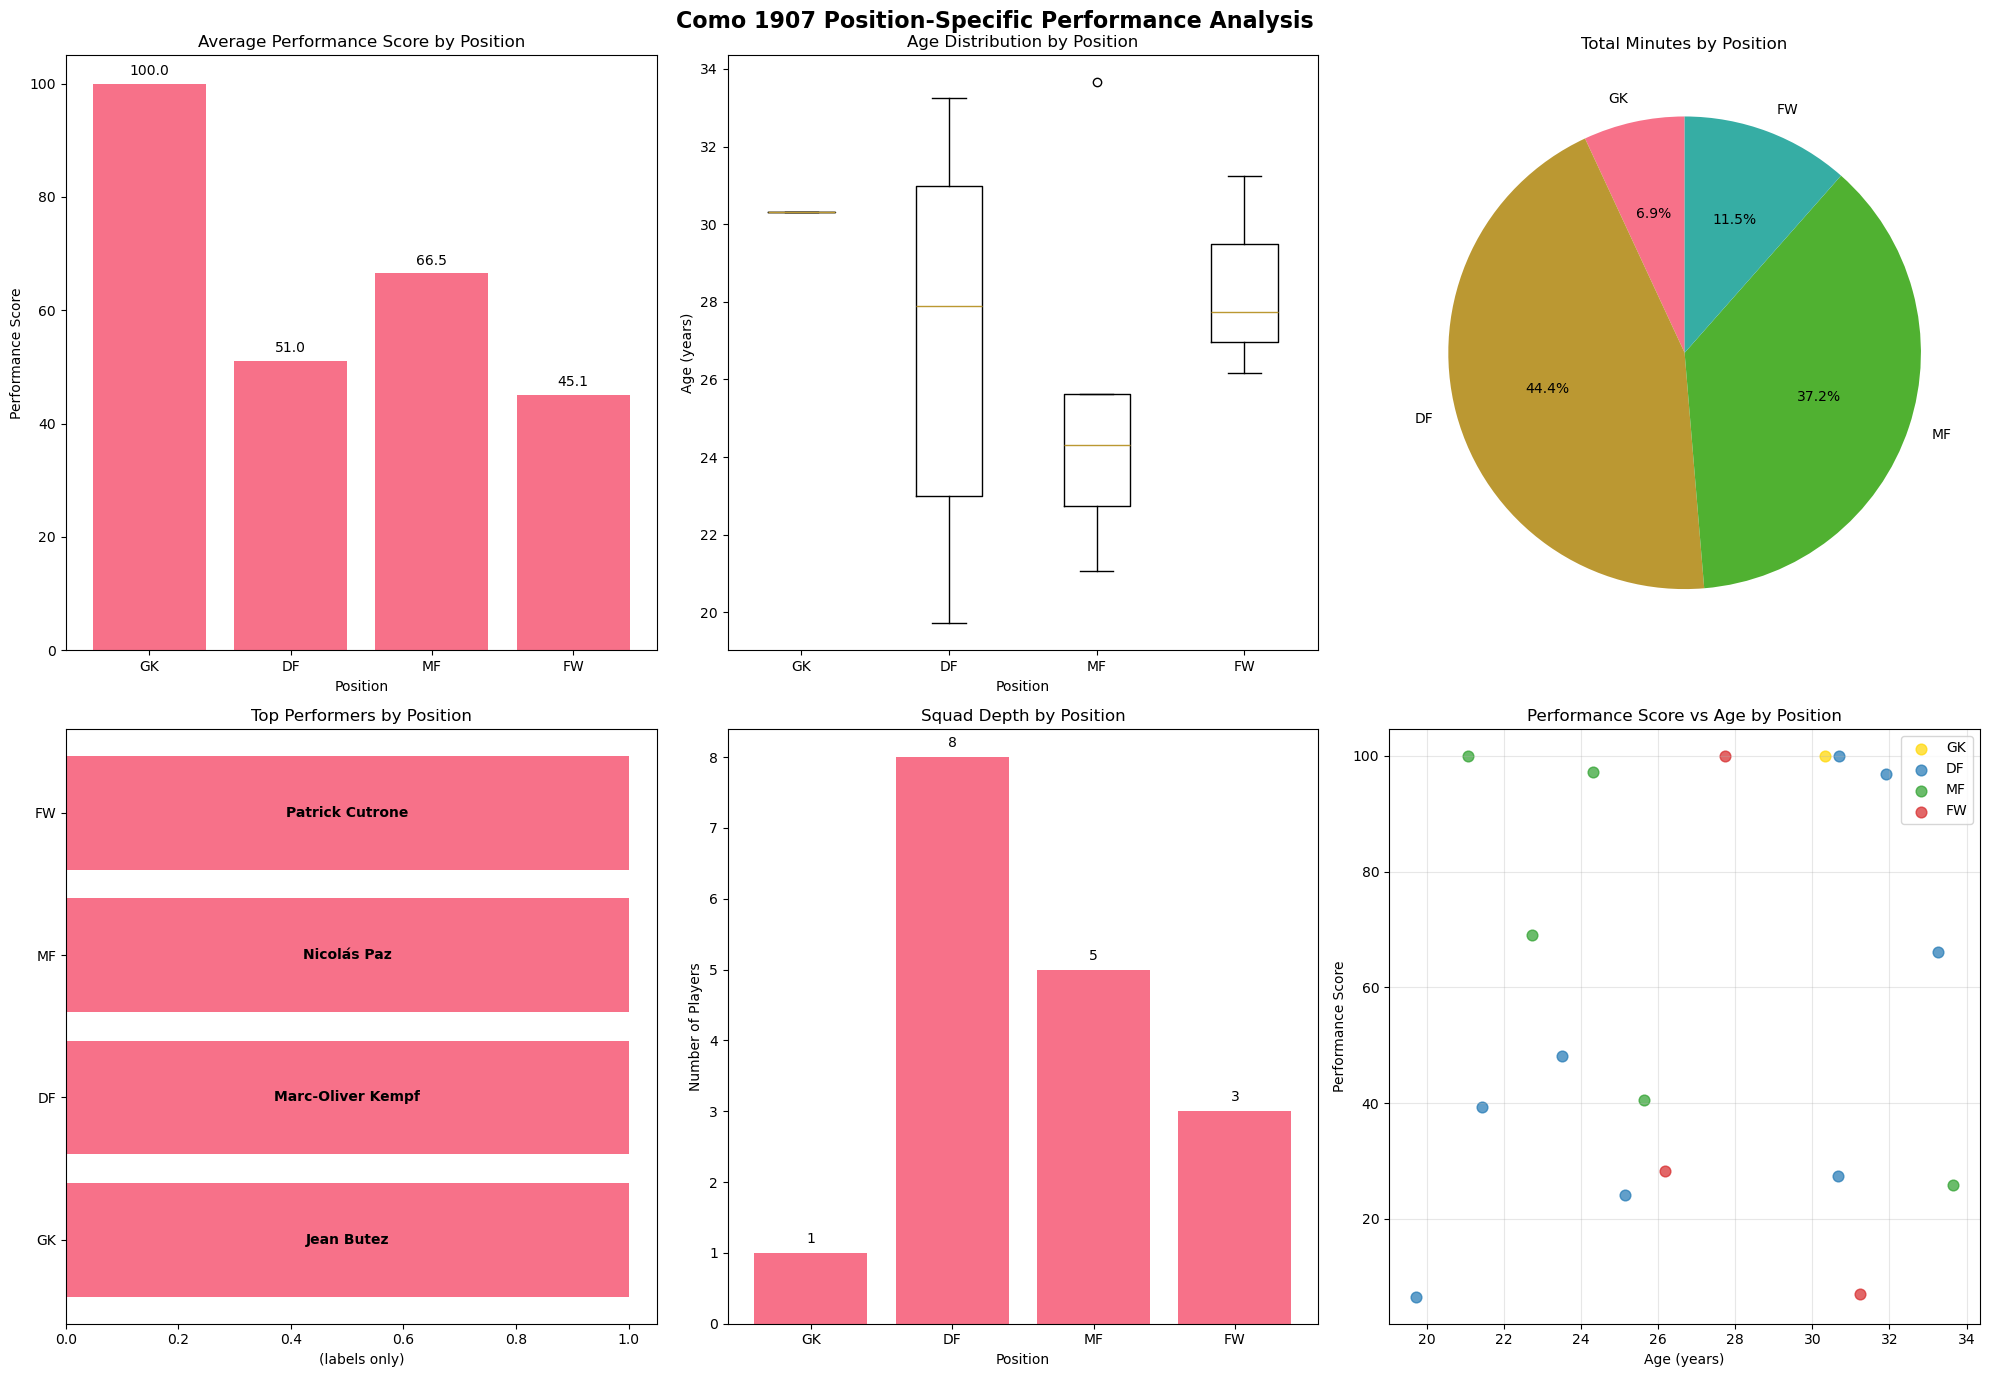

📊 Position-specific visualizations created successfully!
🎯 Dashboard shows comprehensive performance analysis by position


In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

# ---- helpers ----
def parse_fbref_age_series(s: pd.Series) -> pd.Series:
    """Convert 'YY-DDD' (e.g., '30-105') or numeric-like strings to float years."""
    s = s.astype(str)
    m = s.str.extract(r'^\s*(\d+)-(\d+)\s*$')  # YY-DDD
    out = pd.to_numeric(s, errors='coerce')    # handles '30', '30.4', etc.
    mask = m.notna().all(axis=1)
    out.loc[mask] = m.loc[mask, 0].astype(float) + m.loc[mask, 1].astype(float)/365.0
    return out

def to_num(x: pd.Series) -> pd.Series:
    """Coerce numbers with commas/spaces to float."""
    return pd.to_numeric(x.astype(str).str.replace(r'[,\s]', '', regex=True), errors='coerce')

def ensure_perf_score(df_pos: pd.DataFrame) -> pd.DataFrame:
    """If Performance_Score missing/NaN, create a simple minutes-normalized fallback per group."""
    out = df_pos.copy()
    if 'Performance_Score' not in out.columns or out['Performance_Score'].isna().all():
        mins = to_num(out.get('Minutes_2425'))
        m = mins.max(skipna=True)
        out['Performance_Score'] = (mins / m * 100.0).fillna(0.0) if m and m > 0 else 0.0
    return out

# -----------------------------------------
# POSITION-SPECIFIC PERFORMANCE VISUALIZATIONS
print("📊 CREATING POSITION-SPECIFIC PERFORMANCE VISUALIZATIONS")
print("=" * 60)

# Prepare a numeric age column once (does not mutate original)
df_vis = df_performance.copy()
if 'Age_latest' in df_vis.columns:
    df_vis['_age_float'] = parse_fbref_age_series(df_vis['Age_latest'])
if 'Minutes_2425' in df_vis.columns:
    df_vis['_min_2425'] = to_num(df_vis['Minutes_2425'])

fig, axes = plt.subplots(2, 3, figsize=(20, 14))
fig.suptitle('Como 1907 Position-Specific Performance Analysis', fontsize=16, fontweight='bold')

# 1) Average Performance Score by Position
ax1 = axes[0, 0]
position_scores, position_labels = [], []
for pos in ['GK', 'DF', 'MF', 'FW']:
    pos_data = df_vis[df_vis.get('Position_Standard') == pos].copy()
    if len(pos_data) > 0:
        pos_data = ensure_perf_score(pos_data)
        position_scores.append(float(pos_data['Performance_Score'].mean()))
        position_labels.append(pos)

if position_scores:
    bars = ax1.bar(position_labels, position_scores)
    ax1.set_title('Average Performance Score by Position')
    ax1.set_ylabel('Performance Score')
    ax1.set_xlabel('Position')
    for bar, score in zip(bars, position_scores):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                 f'{score:.1f}', ha='center', va='bottom')

# 2) Age Distribution by Position (boxplot) — uses numeric ages
ax2 = axes[0, 1]
position_ages = {}
for pos in ['GK', 'DF', 'MF', 'FW']:
    pos_data = df_vis[df_vis.get('Position_Standard') == pos]
    if len(pos_data) > 0 and '_age_float' in pos_data.columns:
        vals = pos_data['_age_float'].dropna().values
        if len(vals) > 0:
            position_ages[pos] = vals

if position_ages:
    ax2.boxplot([position_ages[p] for p in position_ages.keys()],
                labels=list(position_ages.keys()))
    ax2.set_title('Age Distribution by Position')
    ax2.set_ylabel('Age (years)')
    ax2.set_xlabel('Position')

# 3) Minutes Played share by Position (pie) — sums numeric minutes
ax3 = axes[0, 2]
position_minutes = {}
for pos in ['GK', 'DF', 'MF', 'FW']:
    pos_data = df_vis[df_vis.get('Position_Standard') == pos]
    if len(pos_data) > 0 and '_min_2425' in pos_data.columns:
        total = float(np.nansum(pos_data['_min_2425'].values))
        if total > 0:
            position_minutes[pos] = total

if position_minutes:
    ax3.pie(list(position_minutes.values()), labels=list(position_minutes.keys()),
            autopct='%1.1f%%', startangle=90)
    ax3.set_title('Total Minutes by Position')

# 4) Top Performer names by Position
ax4 = axes[1, 0]
top_performers, present_positions = [], []
for pos in ['GK', 'DF', 'MF', 'FW']:
    pos_data = df_vis[df_vis.get('Position_Standard') == pos].copy()
    if len(pos_data) > 0:
        pos_data = ensure_perf_score(pos_data)
        # if all NaN -> skip
        if pos_data['Performance_Score'].notna().any():
            top_row = pos_data.loc[pos_data['Performance_Score'].idxmax()]
            label = str(top_row.get('Player', '—'))
            top_performers.append(label[:18] + ('…' if len(label) > 18 else ''))
            present_positions.append(pos)

if top_performers:
    y_pos = np.arange(len(present_positions))
    ax4.barh(y_pos, [1]*len(top_performers))
    ax4.set_yticks(y_pos)
    ax4.set_yticklabels(present_positions)
    ax4.set_title('Top Performers by Position')
    ax4.set_xlabel('(labels only)')
    for i, name in enumerate(top_performers):
        ax4.text(0.5, i, name, ha='center', va='center', fontweight='bold')

# 5) Squad Depth by Position (counts)
ax5 = axes[1, 1]
squad_depth = {}
for pos in ['GK', 'DF', 'MF', 'FW']:
    n = int((df_vis.get('Position_Standard') == pos).sum())
    if n > 0:
        squad_depth[pos] = n

if squad_depth:
    bars = ax5.bar(list(squad_depth.keys()), list(squad_depth.values()))
    ax5.set_title('Squad Depth by Position')
    ax5.set_ylabel('Number of Players')
    ax5.set_xlabel('Position')
    for bar, count in zip(bars, squad_depth.values()):
        ax5.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                 str(count), ha='center', va='bottom')

# 6) Performance vs Age Scatter (numeric age + perf)
ax6 = axes[1, 2]
for pos, color in zip(['GK','DF','MF','FW'], ['gold','tab:blue','tab:green','tab:red']):
    pos_data = df_vis[df_vis.get('Position_Standard') == pos].copy()
    if len(pos_data) > 0 and '_age_float' in pos_data.columns:
        pos_data = ensure_perf_score(pos_data)
        x = pos_data['_age_float'].astype(float)
        y = pd.to_numeric(pos_data['Performance_Score'], errors='coerce')
        mask = x.notna() & y.notna()
        if mask.any():
            ax6.scatter(x[mask], y[mask], c=color, label=pos, alpha=0.7, s=60)

ax6.set_title('Performance Score vs Age by Position')
ax6.set_xlabel('Age (years)')
ax6.set_ylabel('Performance Score')
ax6.legend()
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 Position-specific visualizations created successfully!")
print("🎯 Dashboard shows comprehensive performance analysis by position")


In [126]:
# ==============================================
# PERFORMANCE ANALYSIS: INSIGHTS & RECOMMENDATIONS
# ==============================================
import numpy as np
import pandas as pd
import re

print("💡 PERFORMANCE ANALYSIS — INSIGHTS & RECOMMENDATIONS")
print("=" * 70)

# ---------- Helpers ----------
def parse_fbref_age_series(s: pd.Series) -> pd.Series:
    """Convert 'YY-DDD' (e.g., '30-105') or numeric-like strings to float years."""
    s = s.astype(str)
    m = s.str.extract(r'^\s*(\d+)-(\d+)\s*$')   # YY-DDD
    out = pd.to_numeric(s, errors='coerce')     # handles '30', '30.4', etc.
    mask = m.notna().all(axis=1)
    out.loc[mask] = m.loc[mask, 0].astype(float) + m.loc[mask, 1].astype(float) / 365.0
    return out

def to_num(x: pd.Series) -> pd.Series:
    return pd.to_numeric(x.astype(str).str.replace(r'[,\s]', '', regex=True), errors='coerce')

def norm_to_max(s: pd.Series) -> pd.Series:
    s = pd.to_numeric(s, errors="coerce").fillna(0.0)
    m = float(s.max()) if len(s) else 0.0
    return s.div(m).fillna(0.0) if m > 0 else pd.Series(0.0, index=s.index, dtype=float)

def ensure_perf_score_by_pos(df_pos: pd.DataFrame) -> pd.DataFrame:
    """If Performance_Score is fully missing/NaN for a position, create minutes-normalized fallback."""
    out = df_pos.copy()
    if ('Performance_Score' not in out.columns) or out['Performance_Score'].isna().all():
        mins = to_num(out.get('Minutes_2425'))
        m = mins.max(skipna=True)
        out['Performance_Score'] = (mins / m * 100.0).fillna(0.0) if (pd.notna(m) and m > 0) else 0.0
    return out

# ---------- Prepare numeric view ----------
dfv = df_performance.copy()
if 'Age_latest' in dfv.columns:
    dfv['_age_float'] = parse_fbref_age_series(dfv['Age_latest'])
if 'Minutes_2425' in dfv.columns:
    dfv['_min_2425'] = to_num(dfv['Minutes_2425'])

# Make sure each position has a usable Performance_Score
frames = []
for pos in ['GK','DF','MF','FW']:
    sub = dfv[dfv.get('Position_Standard') == pos].copy()
    if len(sub):
        sub = ensure_perf_score_by_pos(sub)
        frames.append(sub)
dfv = pd.concat(frames, axis=0) if frames else dfv

# ---------- OVERALL SQUAD SUMMARY ----------
total_players = len(dfv)
pos_counts = dfv['Position_Standard'].value_counts()
total_minutes = float(np.nansum(dfv.get('_min_2425', pd.Series(dtype=float))))
avg_age = float(dfv.get('_age_float', pd.Series(dtype=float)).mean())

print("📊 OVERALL SQUAD PERFORMANCE SUMMARY")
print("-" * 40)
print(f"   Total players analyzed: {total_players}")
print(f"   Total minutes played: {total_minutes:,.0f}")
print(f"   Average squad age: {avg_age:.1f} years" if np.isfinite(avg_age) else "   Average squad age: —")
print(f"   Position distribution: {dict(pos_counts)}")

# ---------- POSITION-SPECIFIC INSIGHTS ----------
print("\n🎯 POSITION-SPECIFIC INSIGHTS")
print("-" * 40)

pos_summary = {}
for pos in ['GK','DF','MF','FW']:
    pos_df = dfv[dfv.get('Position_Standard') == pos].copy()
    if not len(pos_df):
        continue

    # summaries
    avg_pos_age = float(pos_df['_age_float'].mean()) if pos_df['_age_float'].notna().any() else np.nan
    med_pos_age = float(pos_df['_age_float'].median()) if pos_df['_age_float'].notna().any() else np.nan
    total_pos_minutes = float(np.nansum(pos_df['_min_2425']))
    avg_perf = float(pos_df['Performance_Score'].mean()) if pos_df['Performance_Score'].notna().any() else np.nan

    # age bands
    ages = pos_df['_age_float'].dropna()
    young = int((ages < 23).sum())
    prime = int(((ages >= 23) & (ages <= 30)).sum())
    veteran = int((ages > 30).sum())

    # top performer by Performance_Score
    top_player = None
    if pos_df['Performance_Score'].notna().any():
        row = pos_df.loc[pos_df['Performance_Score'].idxmax()]
        top_player = f"{row.get('Player','—')} ({row['Performance_Score']:.1f})"

    pos_summary[pos] = dict(
        depth=len(pos_df),
        avg_age=avg_pos_age,
        med_age=med_pos_age,
        total_minutes=total_pos_minutes,
        avg_perf=avg_perf,
        young=young, prime=prime, veteran=veteran,
        top=top_player
    )

    print(f"\n{pos} — {len(pos_df)} players")
    print(f"   Avg age: {avg_pos_age:.1f}  |  Median age: {med_pos_age:.1f}" if np.isfinite(avg_pos_age) else "   Age: —")
    print(f"   Total minutes: {total_pos_minutes:,.0f}")
    print(f"   Avg Performance Score: {avg_perf:.1f}" if np.isfinite(avg_perf) else "   Avg Performance Score: —")
    print(f"   Age distribution: {young} young, {prime} prime, {veteran} veteran")
    if top_player:
        print(f"   Top performer: {top_player}")

# ---------- KEY PERFORMANCE INDICATORS ----------
print("\n📊 KEY PERFORMANCE INDICATORS")
print("-" * 40)

# Minutes by position
print("Minutes by position (total / avg per player):")
for pos in ['GK','DF','MF','FW']:
    if pos not in pos_summary: 
        continue
    cnt = pos_summary[pos]['depth']
    tot = pos_summary[pos]['total_minutes']
    avg = (tot / cnt) if cnt > 0 else 0.0
    print(f"   {pos}: {tot:,.0f} total, {avg:,.0f} avg")

# Minutes share (pie logic mirrored from the figure)
minutes_by_pos = {p: pos_summary[p]['total_minutes'] for p in pos_summary}
minutes_total = sum(minutes_by_pos.values())
if minutes_total > 0:
    shares = {p: 100.0 * v / minutes_total for p, v in minutes_by_pos.items()}
    print("\nMinutes share by position (% of squad total):")
    for p in ['GK','DF','MF','FW']:
        if p in shares:
            print(f"   {p}: {shares[p]:.1f}%")

# ---------- SQUAD BALANCE ----------
print("\n⚖️ SQUAD BALANCE")
print("-" * 40)

ages_all = dfv['_age_float'].dropna()
n_all = len(dfv)
young_n = int((ages_all < 23).sum())
prime_n = int(((ages_all >= 23) & (ages_all <= 30)).sum())
veteran_n = int((ages_all > 30).sum())

print("Age balance:")
if n_all > 0:
    print(f"   Young (<23): {young_n} ({young_n/n_all*100:.1f}%)")
    print(f"   Prime (23–30): {prime_n} ({prime_n/n_all*100:.1f}%)")
    print(f"   Veteran (>30): {veteran_n} ({veteran_n/n_all*100:.1f}%)")
else:
    print("   —")

print("\nPosition balance:")
for p in ['GK','DF','MF','FW']:
    c = pos_counts.get(p, 0)
    pct = (100.0 * c / n_all) if n_all else 0.0
    print(f"   {p}: {c} players ({pct:.1f}%)")

# ---------- TRENDS & SHORTLISTS ----------
print("\n📈 TRENDS & SHORTLISTS")
print("-" * 40)

# Top 5 performers by Performance_Score (any position)
if 'Performance_Score' in dfv.columns and dfv['Performance_Score'].notna().any():
    top5 = dfv.sort_values('Performance_Score', ascending=False).head(5)[
        ['Player','Position_Standard','Performance_Score','Minutes_2425','Age_latest']
    ]
    print("Top 5 by Performance Score:")
    print(top5.to_string(index=False))

# Top young prospects by Performance_Score (age < 23)
young_mask = dfv.get('_age_float', pd.Series(dtype=float)) < 23
if young_mask.any():
    young_df = dfv[young_mask]
    if young_df['Performance_Score'].notna().any():
        yp = young_df.sort_values('Performance_Score', ascending=False).head(5)[
            ['Player','Position_Standard','Performance_Score','Minutes_2425','Age_latest']
        ]
        print("\nTop young prospects (<23):")
        print(yp.to_string(index=False))

# Key veterans by Performance_Score (age > 30)
vet_mask = dfv.get('_age_float', pd.Series(dtype=float)) > 30
if vet_mask.any():
    vets = dfv[vet_mask]
    if vets['Performance_Score'].notna().any():
        vt = vets.sort_values('Performance_Score', ascending=False).head(5)[
            ['Player','Position_Standard','Performance_Score','Minutes_2425','Age_latest']
        ]
        print("\nKey veterans (>30):")
        print(vt.to_string(index=False))

# ---------- RECOMMENDATIONS ENGINE ----------
print("\n🎯 STRATEGIC RECOMMENDATIONS")
print("-" * 40)

def safe(v, default=np.nan):
    return v if (v is not None and np.isfinite(v)) else default

# 1) Position priorities (relative performance vs squad average)
avg_perf_overall = dfv['Performance_Score'].mean() if 'Performance_Score' in dfv else np.nan
if np.isfinite(avg_perf_overall):
    weak_units = []
    strong_units = []
    for p, s in pos_summary.items():
        ap = safe(s['avg_perf'])
        if np.isfinite(ap):
            if ap < 0.9 * avg_perf_overall:
                weak_units.append((p, ap))
            elif ap > 1.1 * avg_perf_overall:
                strong_units.append((p, ap))
    if weak_units:
        print("1) Position priorities:")
        for p, ap in weak_units:
            print(f"   • {p}: below-squad performance (avg {ap:.1f}) → consider reinforcement / role clarity")
    if strong_units:
        print("   • High-performing units: " + ", ".join([f"{p} (avg {ap:.1f})" for p, ap in strong_units]))

# 2) Minutes load & dependency
if minutes_total > 0:
    heavy = [p for p, share in shares.items() if share >= 40.0]
    light = [p for p, share in shares.items() if share <= 10.0]
    if heavy:
        print("2) Workload & dependency:")
        for p in heavy:
            print(f"   • {p}: large share of minutes ({shares[p]:.1f}%) → monitor fatigue, ensure depth")
    if light:
        print("   • Underutilized units: " + ", ".join([f"{p} ({shares[p]:.1f}%)" for p in light]) + " → reassess rotation")

# 3) Age curve risks by unit
for p, s in pos_summary.items():
    med = safe(s['med_age'])
    if np.isfinite(med):
        if p in ['DF','FW'] and med >= 28:
            print(f"3) Succession planning: {p} median age {med:.1f} → plan pipeline/integration of younger profiles")
        if p == 'MF' and med <= 23:
            print(f"3) Experience blend: MF median age {med:.1f} → add experienced stabilizer / leadership minutes")

# 4) Depth checks (simple thresholds)
depth_req = {'GK':2, 'DF':8, 'MF':6, 'FW':5}  # tweak if needed
gaps = [p for p, s in pos_summary.items() if s['depth'] < depth_req.get(p, 0)]
if gaps:
    print("4) Depth & contingency:")
    for p in gaps:
        need = depth_req[p] - pos_summary[p]['depth']
        print(f"   • {p}: short by ~{need} players vs baseline → promote youth or target market options")

# 5) Individuals to back or develop
for p, s in pos_summary.items():
    if s['top']:
        print(f"5) Lean into in-form {p}: {s['top']} — keep role clarity & availability high")

# 6) Young prospects & veteran leadership
if young_n / n_all >= 0.30 if n_all else False:
    print("6) Young core: significant U23 presence → formalize development minutes & mentorship pairings")
if veteran_n / n_all >= 0.25 if n_all else False:
    print("6) Veteran core: leverage leadership in high-variance fixtures; manage physical load")

print("\n✅ Insight generation complete — use these flags to guide rotation, recruitment, and development.")



💡 PERFORMANCE ANALYSIS — INSIGHTS & RECOMMENDATIONS
📊 OVERALL SQUAD PERFORMANCE SUMMARY
----------------------------------------
   Total players analyzed: 17
   Total minutes played: 24,054
   Average squad age: 27.0 years
   Position distribution: {'DF': 8, 'MF': 5, 'FW': 3, 'GK': 1}

🎯 POSITION-SPECIFIC INSIGHTS
----------------------------------------

GK — 1 players
   Avg age: 30.3  |  Median age: 30.3
   Total minutes: 1,666
   Avg Performance Score: 100.0
   Age distribution: 0 young, 0 prime, 1 veteran
   Top performer: Jean Butez (100.0)

DF — 8 players
   Avg age: 27.0  |  Median age: 27.9
   Total minutes: 10,679
   Avg Performance Score: 51.0
   Age distribution: 2 young, 2 prime, 4 veteran
   Top performer: Marc-Oliver Kempf (100.0)

MF — 5 players
   Avg age: 25.5  |  Median age: 24.3
   Total minutes: 8,940
   Avg Performance Score: 66.5
   Age distribution: 2 young, 2 prime, 1 veteran
   Top performer: Nicolás Paz (100.0)

FW — 3 players
   Avg age: 28.4  |  Median ag